In [202]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature, io
from skimage import io
import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
# Honey bee as 0.0
# Bumble bee as 1.0

labels = pd.read_csv('dataset/labels.csv', index_col=0)
labels.head()

,genus
id,
520,1.0
3800,1.0
3289,1.0
2695,1.0
4922,1.0


In [3]:
y=labels['genus'].values
y

array([1., 1., 1., ..., 1., 0., 0.])

In [4]:
def get_image(row_id, root='dataset/images/'):
    
    filename = "{}.jpg".format(row_id)
    file_path = os.path.join(root, filename)
    img = io.imread(file_path)
    
    return img

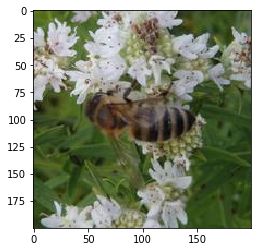

In [5]:
# Visualize Honey Bee
honey_bee_row = labels[labels.genus==0.0].index[5]
honey_bee = get_image(honey_bee_row)
plt.imshow(honey_bee)

In [142]:
# bb_fec = create_features(bb_img)

In [143]:
# bb_hog_features.shape

In [144]:
# test_labels = pd.read_csv('dataset/test_img/test.csv', index_col=0)
# test_labels.head()
# feature_matrix = create_feature_matrix(test_labels)
# feature_matrix.shape

In [138]:
# bb_stand = ss.fit_transform(feature_matrix)
# pca_bb = PCA(n_components=500)


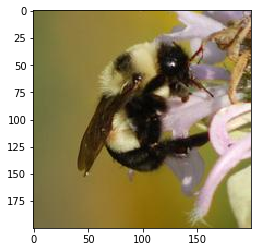

In [6]:
# Visualize Bumblee Bee

bumblee_bee_row = labels[labels.genus==1.0].index[5]
bumblee_bee = get_image(bumblee_bee_row)
plt.imshow(bumblee_bee)

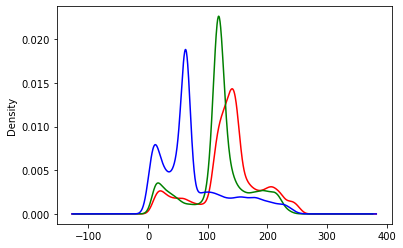

In [7]:
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot.density(c=color)

# create the list of channels
channels = ['r','g','b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:, :, ix], color)

    plt.show()
    
plot_rgb(bumblee_bee)


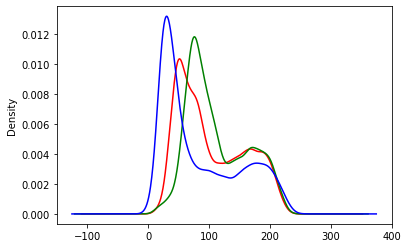

In [8]:
plot_rgb(honey_bee)

# Image manipulation with rgb2grey

In [9]:
from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# import train_test_split from sklearn's model selection module
from sklearn.model_selection import train_test_split

# import SVC from sklearn's svm module
from sklearn.svm import SVC

# import accuracy_score from sklearn's metrics module
from sklearn.metrics import roc_curve, auc, accuracy_score

Color bumblee image has shape:  (200, 200, 3)
Greyscale bumblee image has shape:  (200, 200)


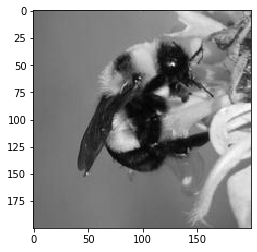

In [10]:
# load a bombus image using our get_image function and bombus_row from the previous cell
bumblee = get_image(bumblee_bee_row)

# print the shape of the bombus image
print('Color bumblee image has shape: ', bumblee.shape)

# convert the bombus image to greyscale
grey_bumblee = rgb2grey(bumblee)

# show the greyscale image
plt.imshow(grey_bumblee, cmap=plt.cm.gray)

# greyscale bombus image only has one channel
print('Greyscale bumblee image has shape: ', grey_bumblee.shape)

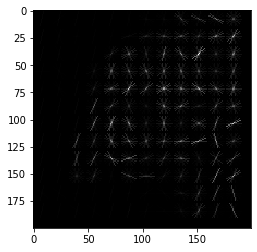

In [11]:
# run HOG using our greyscale bombus image

hog_features, hog_image = hog(grey_bumblee,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

# show our hog_image with a grey colormap
plt.imshow(hog_image, cmap=plt.cm.gray)

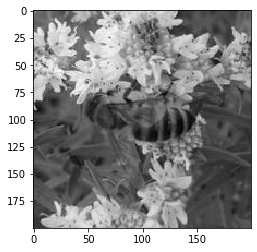

In [190]:
honey_bee_grey = rgb2grey(honey_bee)
plt.imshow(honey_bee_grey, cmap=plt.cm.gray)

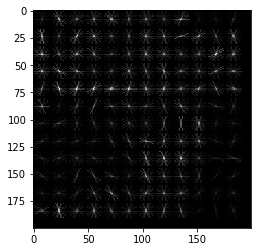

In [191]:
hog_features, hog_image = hog(honey_bee_grey,
                              visualize=True,
                              block_norm='L2-Hys',
                              pixels_per_cell=(16, 16))

# show our hog_image with a grey colormap
plt.imshow(hog_image, cmap=plt.cm.gray)

# Create image features and flatten into a single row

In [192]:
def create_features(img):
    # convert image to greyscale
    grey_image = rgb2grey(img)
    print(grey_image.flatten().shape)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    print(hog_features)
    print("hog_featuers shape", hog_features.shape)
    return hog_features

bumblee_features = create_features(bumblee)

print('The array has shape:', bumblee_features.shape)

(40000,)
[0.30236872 0.06344797 0.01298744 ... 0.02731015 0.27206735 0.1819952 ]
hog_featuers shape (8100,)
The array has shape: (8100,)


# Loop over images to preprocess

In [105]:
def create_feature_matrix(label_dataframe):
    features_list = []

    for img_id in label_dataframe.index:
        # load image
        img = get_image(img_id)
        # get features for image
        image_features = create_features(img)
        features_list.append(image_features)

    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(labels)
feature_matrix.shape

(200, 200, 3)
[129 109 100 ...  59  79  30]
color_featuers shape (120000,)
(40000,)
[0.11709115 0.12527831 0.09012395 ... 0.07845899 0.09084642 0.10375957]
hog_featuers shape (8100,)
[1.29000000e+02 1.09000000e+02 1.00000000e+02 ... 7.84589930e-02
 9.08464151e-02 1.03759566e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 38  48  21 ... 113  53  52]
color_featuers shape (120000,)
(40000,)
[0.37385463 0.04977642 0.00903267 ... 0.028191   0.0174378  0.02438131]
hog_featuers shape (8100,)
[3.80000000e+01 4.80000000e+01 2.10000000e+01 ... 2.81910029e-02
 1.74378023e-02 2.43813066e-02]
flat_features shape (128100,)
(200, 200, 3)
[160 180 131 ...  36  63  18]
color_featuers shape (120000,)
(40000,)
[0.08052947 0.01039212 0.04487226 ... 0.00438562 0.00153095 0.00484867]
hog_featuers shape (8100,)
[1.60000000e+02 1.80000000e+02 1.31000000e+02 ... 4.38562275e-03
 1.53094715e-03 4.84867251e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 93 125   0 ... 137  99 110]
color_featuers shape (1200

[0.07123973 0.03248373 0.03687169 ... 0.0873993  0.1368498  0.15301532]
hog_featuers shape (8100,)
[9.80000000e+01 1.23000000e+02 5.80000000e+01 ... 8.73992963e-02
 1.36849799e-01 1.53015321e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 29  49  38 ...  84 108  94]
color_featuers shape (120000,)
(40000,)
[0.07325098 0.06152814 0.05660806 ... 0.11931656 0.14704483 0.2079768 ]
hog_featuers shape (8100,)
[29.         49.         38.         ...  0.11931656  0.14704483
  0.2079768 ]
flat_features shape (128100,)
(200, 200, 3)
[130 140 129 ...  86 121  55]
color_featuers shape (120000,)
(40000,)
[0.19549314 0.04503875 0.04830777 ... 0.01736469 0.03160289 0.08338967]
hog_featuers shape (8100,)
[1.30000000e+02 1.40000000e+02 1.29000000e+02 ... 1.73646903e-02
 3.16028862e-02 8.33896710e-02]
flat_features shape (128100,)
(200, 200, 3)
[135 135 107 ... 107 138  58]
color_featuers shape (120000,)
(40000,)
[0.03699312 0.15139376 0.20822063 ... 0.03370373 0.04524461 0.06872345]
hog_featuers sha

[0.08222545 0.02404805 0.04873314 ... 0.12911768 0.06392651 0.06692768]
hog_featuers shape (8100,)
[2.18000000e+02 1.84000000e+02 1.47000000e+02 ... 1.29117678e-01
 6.39265074e-02 6.69276813e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 88 102  27 ... 223 202 221]
color_featuers shape (120000,)
(40000,)
[0.00598212 0.00593784 0.00737234 ... 0.00294262 0.00532487 0.02114905]
hog_featuers shape (8100,)
[8.80000000e+01 1.02000000e+02 2.70000000e+01 ... 2.94262277e-03
 5.32486997e-03 2.11490534e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 49  75  36 ...  76 104  82]
color_featuers shape (120000,)
(40000,)
[0.0639721  0.04026274 0.02700637 ... 0.04062584 0.02817982 0.00710948]
hog_featuers shape (8100,)
[4.90000000e+01 7.50000000e+01 3.60000000e+01 ... 4.06258420e-02
 2.81798170e-02 7.10948278e-03]
flat_features shape (128100,)
(200, 200, 3)
[121 137  75 ... 233 215 203]
color_featuers shape (120000,)
(40000,)
[0.07105171 0.04789073 0.03554801 ... 0.21396873 0.21396873 0.1106729 

[0.06607789 0.04493167 0.02040492 ... 0.19264357 0.20327869 0.07382285]
hog_featuers shape (8100,)
[1.50000000e+02 1.52000000e+02 8.90000000e+01 ... 1.92643568e-01
 2.03278688e-01 7.38228528e-02]
flat_features shape (128100,)
(200, 200, 3)
[107 111  97 ...  75  82  49]
color_featuers shape (120000,)
(40000,)
[0.01650352 0.01192072 0.03270625 ... 0.21419627 0.21419627 0.19694152]
hog_featuers shape (8100,)
[107.         111.          97.         ...   0.21419627   0.21419627
   0.19694152]
flat_features shape (128100,)
(200, 200, 3)
[ 84 117  48 ...  89 113  51]
color_featuers shape (120000,)
(40000,)
[0.07208187 0.01452282 0.00583422 ... 0.24336712 0.02252972 0.00321831]
hog_featuers shape (8100,)
[8.40000000e+01 1.17000000e+02 4.80000000e+01 ... 2.43367121e-01
 2.25297245e-02 3.21831181e-03]
flat_features shape (128100,)
(200, 200, 3)
[50 72 25 ... 43 61 47]
color_featuers shape (120000,)
(40000,)
[0.05467058 0.00973698 0.00394691 ... 0.01811067 0.03755797 0.27353813]
hog_featuers sha

 8.01288559e-02 3.98808896e-02]
flat_features shape (128100,)
(200, 200, 3)
[110 125 106 ...  56  71  48]
color_featuers shape (120000,)
(40000,)
[0.19620715 0.16439675 0.21113976 ... 0.19065947 0.14143661 0.05162273]
hog_featuers shape (8100,)
[1.10000000e+02 1.25000000e+02 1.06000000e+02 ... 1.90659468e-01
 1.41436611e-01 5.16227309e-02]
flat_features shape (128100,)
(200, 200, 3)
[245 132 220 ... 242 190 228]
color_featuers shape (120000,)
(40000,)
[0.20993161 0.15598932 0.23540857 ... 0.1321099  0.03817934 0.03446428]
hog_featuers shape (8100,)
[2.45000000e+02 1.32000000e+02 2.20000000e+02 ... 1.32109898e-01
 3.81793440e-02 3.44642757e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 98 106  55 ...  14  30  20]
color_featuers shape (120000,)
(40000,)
[0.20904371 0.0811915  0.02103927 ... 0.07611429 0.10538382 0.22676228]
hog_featuers shape (8100,)
[9.80000000e+01 1.06000000e+02 5.50000000e+01 ... 7.61142854e-02
 1.05383818e-01 2.26762277e-01]
flat_features shape (128100,)
(200, 20

[0.07890679 0.08723158 0.10601763 ... 0.16581972 0.20171018 0.15826969]
hog_featuers shape (8100,)
[31.         63.         14.         ...  0.16581972  0.20171018
  0.15826969]
flat_features shape (128100,)
(200, 200, 3)
[254 247 255 ...   7  19   0]
color_featuers shape (120000,)
(40000,)
[0.09818716 0.06678055 0.06654225 ... 0.18818656 0.13400085 0.19466199]
hog_featuers shape (8100,)
[2.54000000e+02 2.47000000e+02 2.55000000e+02 ... 1.88186561e-01
 1.34000847e-01 1.94661992e-01]
flat_features shape (128100,)
(200, 200, 3)
[100 124  62 ...  69 110  34]
color_featuers shape (120000,)
(40000,)
[0.08050263 0.2410719  0.2410719  ... 0.03865193 0.05346868 0.08703172]
hog_featuers shape (8100,)
[1.00000000e+02 1.24000000e+02 6.20000000e+01 ... 3.86519258e-02
 5.34686768e-02 8.70317187e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 78 106  91 ... 101 155  80]
color_featuers shape (120000,)
(40000,)
[0.00177311 0.00191147 0.01472458 ... 0.04984866 0.00924835 0.00592388]
hog_featuers sha

[0.09453599 0.01735596 0.13809988 ... 0.14956833 0.05728523 0.0420671 ]
hog_featuers shape (8100,)
[3.10000000e+01 4.30000000e+01 2.90000000e+01 ... 1.49568331e-01
 5.72852258e-02 4.20670959e-02]
flat_features shape (128100,)
(200, 200, 3)
[253 110 215 ... 236  89 193]
color_featuers shape (120000,)
(40000,)
[0.02649609 0.0137867  0.02018623 ... 0.13799616 0.26116118 0.10356217]
hog_featuers shape (8100,)
[2.53000000e+02 1.10000000e+02 2.15000000e+02 ... 1.37996160e-01
 2.61161178e-01 1.03562168e-01]
flat_features shape (128100,)
(200, 200, 3)
[38 72 22 ... 78 74 10]
color_featuers shape (120000,)
(40000,)
[0.04219923 0.00955661 0.01733963 ... 0.0079162  0.01668885 0.02235843]
hog_featuers shape (8100,)
[3.80000000e+01 7.20000000e+01 2.20000000e+01 ... 7.91620188e-03
 1.66888525e-02 2.23584314e-02]
flat_features shape (128100,)
(200, 200, 3)
[63 46 18 ... 21 24  7]
color_featuers shape (120000,)
(40000,)
[0.02257748 0.01141945 0.00313372 ... 0.00324559 0.00492437 0.03286218]
hog_featue

[0.0626604  0.04891655 0.01282055 ... 0.0489464  0.19454834 0.31814464]
hog_featuers shape (8100,)
[1.04000000e+02 1.12000000e+02 5.50000000e+01 ... 4.89464046e-02
 1.94548344e-01 3.18144639e-01]
flat_features shape (128100,)
(200, 200, 3)
[65 56 51 ... 83 87 90]
color_featuers shape (120000,)
(40000,)
[0.06317094 0.04903405 0.05397995 ... 0.23796891 0.23796891 0.02463107]
hog_featuers shape (8100,)
[6.50000000e+01 5.60000000e+01 5.10000000e+01 ... 2.37968905e-01
 2.37968905e-01 2.46310680e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 28  53  31 ...  92 126 125]
color_featuers shape (120000,)
(40000,)
[0.12332088 0.00639367 0.03454828 ... 0.04269804 0.05873531 0.09525224]
hog_featuers shape (8100,)
[2.80000000e+01 5.30000000e+01 3.10000000e+01 ... 4.26980407e-02
 5.87353120e-02 9.52522446e-02]
flat_features shape (128100,)
(200, 200, 3)
[114 127  71 ...  94 111  56]
color_featuers shape (120000,)
(40000,)
[0.18435536 0.06075029 0.15963106 ... 0.0110341  0.01922738 0.01099397]
hog_

[0.04441926 0.02155946 0.04351907 ... 0.03560994 0.05056085 0.01715937]
hog_featuers shape (8100,)
[1.00000000e+02 1.33000000e+02 6.20000000e+01 ... 3.56099401e-02
 5.05608465e-02 1.71593723e-02]
flat_features shape (128100,)
(200, 200, 3)
[235 172 155 ... 119 120 115]
color_featuers shape (120000,)
(40000,)
[0.0479347  0.01795123 0.03441052 ... 0.04876507 0.04670781 0.03269542]
hog_featuers shape (8100,)
[2.35000000e+02 1.72000000e+02 1.55000000e+02 ... 4.87650685e-02
 4.67078106e-02 3.26954190e-02]
flat_features shape (128100,)
(200, 200, 3)
[71 73 33 ... 54 63 20]
color_featuers shape (120000,)
(40000,)
[0.05498403 0.02253073 0.02575557 ... 0.00766944 0.00535025 0.00164743]
hog_featuers shape (8100,)
[7.10000000e+01 7.30000000e+01 3.30000000e+01 ... 7.66944091e-03
 5.35025132e-03 1.64742605e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 91 133  67 ...  54  96  46]
color_featuers shape (120000,)
(40000,)
[0.14339072 0.21803209 0.13966279 ... 0.02943237 0.01409816 0.03404127]
hog_

[0.03585396 0.01033444 0.01097108 ... 0.17959893 0.07474075 0.06723179]
hog_featuers shape (8100,)
[6.50000000e+01 8.10000000e+01 1.60000000e+01 ... 1.79598932e-01
 7.47407465e-02 6.72317876e-02]
flat_features shape (128100,)
(200, 200, 3)
[124 107  97 ... 243 246 217]
color_featuers shape (120000,)
(40000,)
[0.14647175 0.0401521  0.03448714 ... 0.11933107 0.05788602 0.04277856]
hog_featuers shape (8100,)
[1.24000000e+02 1.07000000e+02 9.70000000e+01 ... 1.19331075e-01
 5.78860210e-02 4.27785644e-02]
flat_features shape (128100,)
(200, 200, 3)
[141 129  43 ...  99  99  39]
color_featuers shape (120000,)
(40000,)
[0.18751703 0.09789707 0.16731457 ... 0.13667706 0.1010941  0.04523535]
hog_featuers shape (8100,)
[1.41000000e+02 1.29000000e+02 4.30000000e+01 ... 1.36677062e-01
 1.01094099e-01 4.52353538e-02]
flat_features shape (128100,)
(200, 200, 3)
[109 125  50 ... 158 163 131]
color_featuers shape (120000,)
(40000,)
[0.14837917 0.15519282 0.16989165 ... 0.21866066 0.1660664  0.04789374

[0.05103542 0.02902768 0.03851102 ... 0.06760215 0.05749772 0.03363581]
hog_featuers shape (8100,)
[8.90000000e+01 1.33000000e+02 3.80000000e+01 ... 6.76021520e-02
 5.74977223e-02 3.36358080e-02]
flat_features shape (128100,)
(200, 200, 3)
[213 212 158 ... 138 151  97]
color_featuers shape (120000,)
(40000,)
[0.0358901  0.10508497 0.1540536  ... 0.0403534  0.03531867 0.03370518]
hog_featuers shape (8100,)
[2.13000000e+02 2.12000000e+02 1.58000000e+02 ... 4.03533990e-02
 3.53186709e-02 3.37051828e-02]
flat_features shape (128100,)
(200, 200, 3)
[244 240 255 ... 107 139   2]
color_featuers shape (120000,)
(40000,)
[0.13835866 0.09424541 0.12116644 ... 0.03153454 0.0415778  0.06094698]
hog_featuers shape (8100,)
[2.44000000e+02 2.40000000e+02 2.55000000e+02 ... 3.15345437e-02
 4.15777982e-02 6.09469833e-02]
flat_features shape (128100,)
(200, 200, 3)
[53 63 10 ... 90 77 43]
color_featuers shape (120000,)
(40000,)
[0.01169476 0.01066608 0.0216076  ... 0.04403021 0.0264134  0.06107966]
hog_

(200, 200, 3)
[ 65  93  52 ... 119 142 114]
color_featuers shape (120000,)
(40000,)
[0.05966729 0.0502896  0.09060566 ... 0.02757129 0.03389325 0.03333863]
hog_featuers shape (8100,)
[6.50000000e+01 9.30000000e+01 5.20000000e+01 ... 2.75712888e-02
 3.38932503e-02 3.33386269e-02]
flat_features shape (128100,)
(200, 200, 3)
[179 150 118 ... 134 134  62]
color_featuers shape (120000,)
(40000,)
[0.04390974 0.03393299 0.032743   ... 0.06318662 0.01391717 0.01819852]
hog_featuers shape (8100,)
[1.79000000e+02 1.50000000e+02 1.18000000e+02 ... 6.31866249e-02
 1.39171710e-02 1.81985158e-02]
flat_features shape (128100,)
(200, 200, 3)
[177 208 128 ... 115 124 105]
color_featuers shape (120000,)
(40000,)
[0.23581439 0.23581439 0.23581439 ... 0.04895086 0.08229547 0.22303814]
hog_featuers shape (8100,)
[1.77000000e+02 2.08000000e+02 1.28000000e+02 ... 4.89508564e-02
 8.22954664e-02 2.23038141e-01]
flat_features shape (128100,)
(200, 200, 3)
[119 114  92 ... 124 127  70]
color_featuers shape (1200

[2.10000000e+01 2.80000000e+01 2.10000000e+01 ... 1.32299267e-01
 5.99018060e-02 2.25830655e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 91 141 230 ... 181 195  98]
color_featuers shape (120000,)
(40000,)
[0.02323524 0.02107506 0.0323645  ... 0.01907111 0.01258588 0.05379316]
hog_featuers shape (8100,)
[9.10000000e+01 1.41000000e+02 2.30000000e+02 ... 1.90711085e-02
 1.25858788e-02 5.37931613e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 65 113  11 ... 201  68  11]
color_featuers shape (120000,)
(40000,)
[0.13284207 0.052889   0.08456866 ... 0.04136548 0.23264625 0.18177266]
hog_featuers shape (8100,)
[6.50000000e+01 1.13000000e+02 1.10000000e+01 ... 4.13654807e-02
 2.32646251e-01 1.81772659e-01]
flat_features shape (128100,)
(200, 200, 3)
[169 144  78 ... 119 110  45]
color_featuers shape (120000,)
(40000,)
[0.0613273  0.0550597  0.0213184  ... 0.09810756 0.02931702 0.05702011]
hog_featuers shape (8100,)
[1.69000000e+02 1.44000000e+02 7.80000000e+01 ... 9.81075562e-02
 2.93

[0.15617802 0.08522129 0.08081623 ... 0.03974409 0.1025031  0.1458672 ]
hog_featuers shape (8100,)
[2.00000000e+02 1.68000000e+02 5.00000000e+00 ... 3.97440939e-02
 1.02503096e-01 1.45867204e-01]
flat_features shape (128100,)
(200, 200, 3)
[76 84 71 ... 43 63 51]
color_featuers shape (120000,)
(40000,)
[0.12345157 0.07180981 0.06185132 ... 0.07679785 0.05631485 0.07504003]
hog_featuers shape (8100,)
[7.60000000e+01 8.40000000e+01 7.10000000e+01 ... 7.67978523e-02
 5.63148455e-02 7.50400287e-02]
flat_features shape (128100,)
(200, 200, 3)
[168 147 142 ... 102 117  62]
color_featuers shape (120000,)
(40000,)
[0.1288106  0.0410402  0.01210792 ... 0.00052743 0.00670285 0.00710109]
hog_featuers shape (8100,)
[1.68000000e+02 1.47000000e+02 1.42000000e+02 ... 5.27428926e-04
 6.70284599e-03 7.10109233e-03]
flat_features shape (128100,)
(200, 200, 3)
[242 216   0 ... 255 239  27]
color_featuers shape (120000,)
(40000,)
[0.02660504 0.00444822 0.00238343 ... 0.08407604 0.0621434  0.01221521]
hog_

[0.02257455 0.0254882  0.01820388 ... 0.00216174 0.00053304 0.        ]
hog_featuers shape (8100,)
[1.85000000e+02 1.44000000e+02 1.26000000e+02 ... 2.16173758e-03
 5.33044334e-04 0.00000000e+00]
flat_features shape (128100,)
(200, 200, 3)
[ 64 102  81 ... 168 141 186]
color_featuers shape (120000,)
(40000,)
[0.05330683 0.04917473 0.06171534 ... 0.09610149 0.21768027 0.25089149]
hog_featuers shape (8100,)
[6.40000000e+01 1.02000000e+02 8.10000000e+01 ... 9.61014886e-02
 2.17680275e-01 2.50891488e-01]
flat_features shape (128100,)
(200, 200, 3)
[142 148  76 ... 126 154  77]
color_featuers shape (120000,)
(40000,)
[0.24455436 0.02526974 0.01778119 ... 0.01994713 0.00090278 0.00129803]
hog_featuers shape (8100,)
[1.42000000e+02 1.48000000e+02 7.60000000e+01 ... 1.99471320e-02
 9.02781299e-04 1.29803397e-03]
flat_features shape (128100,)
(200, 200, 3)
[180 118 215 ...  28  54  25]
color_featuers shape (120000,)
(40000,)
[0.12809372 0.11386326 0.08202636 ... 0.03294942 0.05738518 0.05035837

[0.07751481 0.03754805 0.02826832 ... 0.23127481 0.06493788 0.0298847 ]
hog_featuers shape (8100,)
[1.17000000e+02 1.13000000e+02 1.01000000e+02 ... 2.31274812e-01
 6.49378779e-02 2.98847011e-02]
flat_features shape (128100,)
(200, 200, 3)
[125 123  84 ...  84  82  57]
color_featuers shape (120000,)
(40000,)
[0.268391   0.14658002 0.268391   ... 0.1839999  0.11552664 0.07888332]
hog_featuers shape (8100,)
[1.25000000e+02 1.23000000e+02 8.40000000e+01 ... 1.83999899e-01
 1.15526643e-01 7.88833218e-02]
flat_features shape (128100,)
(200, 200, 3)
[47 58 44 ... 36 50 37]
color_featuers shape (120000,)
(40000,)
[0.0170042  0.01309378 0.01083321 ... 0.07132789 0.03238446 0.03423791]
hog_featuers shape (8100,)
[4.70000000e+01 5.80000000e+01 4.40000000e+01 ... 7.13278924e-02
 3.23844574e-02 3.42379088e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 95 114  69 ...  97 117  48]
color_featuers shape (120000,)
(40000,)
[0.14752049 0.13342872 0.10276292 ... 0.21279218 0.18006304 0.08318277]
hog_

[0.12523531 0.11640415 0.0560258  ... 0.00646392 0.00578056 0.00715686]
hog_featuers shape (8100,)
[8.60000000e+01 1.14000000e+02 1.40000000e+01 ... 6.46391567e-03
 5.78056285e-03 7.15686060e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 84  64  76 ... 138 172 139]
color_featuers shape (120000,)
(40000,)
[0.10308876 0.12523919 0.11194027 ... 0.02917388 0.09554386 0.23687585]
hog_featuers shape (8100,)
[8.40000000e+01 6.40000000e+01 7.60000000e+01 ... 2.91738792e-02
 9.55438639e-02 2.36875851e-01]
flat_features shape (128100,)
(200, 200, 3)
[121  96 135 ...  94  99  59]
color_featuers shape (120000,)
(40000,)
[0.17293852 0.0660219  0.04564116 ... 0.01989618 0.03134225 0.05096373]
hog_featuers shape (8100,)
[1.21000000e+02 9.60000000e+01 1.35000000e+02 ... 1.98961782e-02
 3.13422462e-02 5.09637271e-02]
flat_features shape (128100,)
(200, 200, 3)
[28 44 17 ... 43 67 33]
color_featuers shape (120000,)
(40000,)
[0.01586483 0.0092776  0.01866297 ... 0.25611892 0.25611892 0.15725915]
hog_

[0.28690886 0.28511092 0.13059665 ... 0.10494397 0.12283946 0.20820978]
hog_featuers shape (8100,)
[1.04000000e+02 1.13000000e+02 7.00000000e+01 ... 1.04943965e-01
 1.22839460e-01 2.08209779e-01]
flat_features shape (128100,)
(200, 200, 3)
[161 150  70 ... 121 147  58]
color_featuers shape (120000,)
(40000,)
[0.10442957 0.04918028 0.11828391 ... 0.02915055 0.02910699 0.02677886]
hog_featuers shape (8100,)
[1.61000000e+02 1.50000000e+02 7.00000000e+01 ... 2.91505450e-02
 2.91069912e-02 2.67788599e-02]
flat_features shape (128100,)
(200, 200, 3)
[172 196 112 ... 160  59  41]
color_featuers shape (120000,)
(40000,)
[0.09877991 0.06217564 0.02333216 ... 0.08640795 0.05856595 0.10605244]
hog_featuers shape (8100,)
[1.72000000e+02 1.96000000e+02 1.12000000e+02 ... 8.64079500e-02
 5.85659549e-02 1.06052439e-01]
flat_features shape (128100,)
(200, 200, 3)
[138 122  97 ... 118 105  89]
color_featuers shape (120000,)
(40000,)
[0.05011698 0.02942941 0.04849967 ... 0.0191792  0.02607527 0.11238549

[62 85 13 ... 67 85 35]
color_featuers shape (120000,)
(40000,)
[0.14072824 0.23610175 0.24968896 ... 0.02993542 0.03049606 0.06575876]
hog_featuers shape (8100,)
[6.20000000e+01 8.50000000e+01 1.30000000e+01 ... 2.99354189e-02
 3.04960558e-02 6.57587643e-02]
flat_features shape (128100,)
(200, 200, 3)
[142 163 130 ... 169 184 119]
color_featuers shape (120000,)
(40000,)
[0.06551777 0.04565447 0.05665214 ... 0.09761743 0.12123351 0.14545821]
hog_featuers shape (8100,)
[1.42000000e+02 1.63000000e+02 1.30000000e+02 ... 9.76174340e-02
 1.21233506e-01 1.45458213e-01]
flat_features shape (128100,)
(200, 200, 3)
[118 127  74 ...  95  96  56]
color_featuers shape (120000,)
(40000,)
[0.191214   0.02236188 0.05566427 ... 0.02654415 0.00602428 0.00407171]
hog_featuers shape (8100,)
[1.18000000e+02 1.27000000e+02 7.40000000e+01 ... 2.65441543e-02
 6.02428491e-03 4.07170869e-03]
flat_features shape (128100,)
(200, 200, 3)
[248  96 134 ...  89 111  46]
color_featuers shape (120000,)
(40000,)
[0.075

[141  54  34 ... 237 166 138]
color_featuers shape (120000,)
(40000,)
[0.00477244 0.00438191 0.00701542 ... 0.01528551 0.04385609 0.04564502]
hog_featuers shape (8100,)
[1.41000000e+02 5.40000000e+01 3.40000000e+01 ... 1.52855086e-02
 4.38560868e-02 4.56450186e-02]
flat_features shape (128100,)
(200, 200, 3)
[194 183  75 ... 123 123  69]
color_featuers shape (120000,)
(40000,)
[0.21797322 0.23067327 0.14148823 ... 0.05816787 0.07537671 0.14285538]
hog_featuers shape (8100,)
[1.94000000e+02 1.83000000e+02 7.50000000e+01 ... 5.81678651e-02
 7.53767135e-02 1.42855382e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 57  73  44 ... 194 193 201]
color_featuers shape (120000,)
(40000,)
[0.01190927 0.00765624 0.02633735 ... 0.11496926 0.10083924 0.09064908]
hog_featuers shape (8100,)
[57.         73.         44.         ...  0.11496926  0.10083924
  0.09064908]
flat_features shape (128100,)
(200, 200, 3)
[139 135  87 ... 160 152 113]
color_featuers shape (120000,)
(40000,)
[0.07193859 0.0334

[0.09192194 0.05269296 0.0756829  ... 0.03608149 0.01569374 0.01753757]
hog_featuers shape (8100,)
[1.24000000e+02 9.80000000e+01 6.30000000e+01 ... 3.60814850e-02
 1.56937430e-02 1.75375748e-02]
flat_features shape (128100,)
(200, 200, 3)
[105  83  34 ... 207 188 184]
color_featuers shape (120000,)
(40000,)
[0.10123688 0.         0.01345894 ... 0.13871961 0.1067649  0.06586466]
hog_featuers shape (8100,)
[1.05000000e+02 8.30000000e+01 3.40000000e+01 ... 1.38719609e-01
 1.06764898e-01 6.58646568e-02]
flat_features shape (128100,)
(200, 200, 3)
[154 158  84 ... 120 146  83]
color_featuers shape (120000,)
(40000,)
[0.02176126 0.01721475 0.11166677 ... 0.0098452  0.07135044 0.22988219]
hog_featuers shape (8100,)
[1.54000000e+02 1.58000000e+02 8.40000000e+01 ... 9.84519531e-03
 7.13504437e-02 2.29882188e-01]
flat_features shape (128100,)
(200, 200, 3)
[100 120  67 ... 198 215 163]
color_featuers shape (120000,)
(40000,)
[0.20786692 0.09219831 0.05695103 ... 0.04909883 0.29078845 0.29078845

[0.03536357 0.01135277 0.01803041 ... 0.09613905 0.06903099 0.05515307]
hog_featuers shape (8100,)
[1.07000000e+02 1.36000000e+02 4.60000000e+01 ... 9.61390515e-02
 6.90309854e-02 5.51530704e-02]
flat_features shape (128100,)
(200, 200, 3)
[154 103  50 ...  84  77  25]
color_featuers shape (120000,)
(40000,)
[0.01976931 0.00312723 0.0077979  ... 0.04493263 0.05435338 0.02776801]
hog_featuers shape (8100,)
[1.54000000e+02 1.03000000e+02 5.00000000e+01 ... 4.49326273e-02
 5.43533756e-02 2.77680082e-02]
flat_features shape (128100,)
(200, 200, 3)
[137 190  82 ... 123 165  79]
color_featuers shape (120000,)
(40000,)
[0.08874318 0.05313759 0.11307851 ... 0.01891415 0.01839807 0.01826715]
hog_featuers shape (8100,)
[1.37000000e+02 1.90000000e+02 8.20000000e+01 ... 1.89141466e-02
 1.83980747e-02 1.82671486e-02]
flat_features shape (128100,)
(200, 200, 3)
[177 166 170 ...   6   6   4]
color_featuers shape (120000,)
(40000,)
[0.22354541 0.11363238 0.20265609 ... 0.01795582 0.03025434 0.02189791

[0.14546067 0.04464934 0.01266143 ... 0.15794145 0.10565847 0.07567519]
hog_featuers shape (8100,)
[9.80000000e+01 1.21000000e+02 5.10000000e+01 ... 1.57941451e-01
 1.05658468e-01 7.56751880e-02]
flat_features shape (128100,)
(200, 200, 3)
[103 103  93 ... 167 174 123]
color_featuers shape (120000,)
(40000,)
[0.04073582 0.0389471  0.04277194 ... 0.23367583 0.05744153 0.04516877]
hog_featuers shape (8100,)
[1.03000000e+02 1.03000000e+02 9.30000000e+01 ... 2.33675834e-01
 5.74415298e-02 4.51687749e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 84 110  71 ... 151 168 134]
color_featuers shape (120000,)
(40000,)
[0.08300547 0.03945341 0.07009154 ... 0.0021185  0.         0.        ]
hog_featuers shape (8100,)
[8.400000e+01 1.100000e+02 7.100000e+01 ... 2.118499e-03 0.000000e+00
 0.000000e+00]
flat_features shape (128100,)
(200, 200, 3)
[105 112  61 ...  41  85   6]
color_featuers shape (120000,)
(40000,)
[0.08048312 0.07544393 0.19310413 ... 0.23632209 0.16735503 0.11030462]
hog_featue

[0.07349488 0.20107598 0.21320822 ... 0.0083227  0.01136446 0.01492693]
hog_featuers shape (8100,)
[1.02000000e+02 6.90000000e+01 7.60000000e+01 ... 8.32270107e-03
 1.13644644e-02 1.49269258e-02]
flat_features shape (128100,)
(200, 200, 3)
[144 147  56 ... 106  93   0]
color_featuers shape (120000,)
(40000,)
[0.07633131 0.05778316 0.09606684 ... 0.04618695 0.09230229 0.04998597]
hog_featuers shape (8100,)
[1.44000000e+02 1.47000000e+02 5.60000000e+01 ... 4.61869502e-02
 9.23022885e-02 4.99859694e-02]
flat_features shape (128100,)
(200, 200, 3)
[146 149 154 ... 133 142  95]
color_featuers shape (120000,)
(40000,)
[2.93915781e-02 2.35798755e-04 2.35798755e-04 ... 2.42020515e-01
 1.14629963e-01 4.08563589e-02]
hog_featuers shape (8100,)
[1.46000000e+02 1.49000000e+02 1.54000000e+02 ... 2.42020515e-01
 1.14629963e-01 4.08563589e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 75  79  18 ... 153 113  17]
color_featuers shape (120000,)
(40000,)
[0.17430915 0.01055841 0.         ... 0.20786

color_featuers shape (120000,)
(40000,)
[0.01634554 0.00476468 0.02965901 ... 0.05682894 0.27859795 0.08668971]
hog_featuers shape (8100,)
[2.55000000e+02 2.43000000e+02 1.30000000e+01 ... 5.68289445e-02
 2.78597950e-01 8.66897074e-02]
flat_features shape (128100,)
(200, 200, 3)
[242 202 255 ...  79  71  48]
color_featuers shape (120000,)
(40000,)
[0.04910797 0.00663736 0.02298276 ... 0.21812212 0.20111494 0.11778211]
hog_featuers shape (8100,)
[2.42000000e+02 2.02000000e+02 2.55000000e+02 ... 2.18122122e-01
 2.01114937e-01 1.17782106e-01]
flat_features shape (128100,)
(200, 200, 3)
[143 178  94 ... 102 137  55]
color_featuers shape (120000,)
(40000,)
[0.0688018  0.01350916 0.00478016 ... 0.04691628 0.01573585 0.00644621]
hog_featuers shape (8100,)
[1.43000000e+02 1.78000000e+02 9.40000000e+01 ... 4.69162790e-02
 1.57358530e-02 6.44621274e-03]
flat_features shape (128100,)
(200, 200, 3)
[239 173 244 ... 129 137 100]
color_featuers shape (120000,)
(40000,)
[0.04943574 0.0045956  0.00301

[8.40000000e+01 9.50000000e+01 2.60000000e+01 ... 2.13610525e-02
 2.11610780e-02 1.12110444e-01]
flat_features shape (128100,)
(200, 200, 3)
[119 120  40 ... 143 170 103]
color_featuers shape (120000,)
(40000,)
[0.01127338 0.00172326 0.01125961 ... 0.07330627 0.06166487 0.02361656]
hog_featuers shape (8100,)
[1.19000000e+02 1.20000000e+02 4.00000000e+01 ... 7.33062744e-02
 6.16648655e-02 2.36165566e-02]
flat_features shape (128100,)
(200, 200, 3)
[131 117 108 ...  63  92  36]
color_featuers shape (120000,)
(40000,)
[0.18088397 0.09312282 0.2026737  ... 0.02189612 0.04385162 0.04800125]
hog_featuers shape (8100,)
[1.31000000e+02 1.17000000e+02 1.08000000e+02 ... 2.18961243e-02
 4.38516248e-02 4.80012506e-02]
flat_features shape (128100,)
(200, 200, 3)
[116  80  58 ...  76  60  34]
color_featuers shape (120000,)
(40000,)
[0.06529439 0.06140111 0.05441932 ... 0.01472504 0.01451423 0.03175133]
hog_featuers shape (8100,)
[1.16000000e+02 8.00000000e+01 5.80000000e+01 ... 1.47250381e-02
 1.45

hog_featuers shape (8100,)
[2.55000000e+02 2.26000000e+02 2.43000000e+02 ... 5.59557469e-02
 4.19382414e-02 4.92766589e-02]
flat_features shape (128100,)
(200, 200, 3)
[45 63 11 ... 65 74 21]
color_featuers shape (120000,)
(40000,)
[0.08528735 0.00728462 0.03420272 ... 0.05278539 0.04040487 0.11066156]
hog_featuers shape (8100,)
[4.50000000e+01 6.30000000e+01 1.10000000e+01 ... 5.27853892e-02
 4.04048675e-02 1.10661565e-01]
flat_features shape (128100,)
(200, 200, 3)
[125 160  40 ...  96 125  43]
color_featuers shape (120000,)
(40000,)
[0.01897214 0.03562531 0.03615206 ... 0.00946572 0.01166    0.07723102]
hog_featuers shape (8100,)
[1.25000000e+02 1.60000000e+02 4.00000000e+01 ... 9.46571862e-03
 1.16600020e-02 7.72310244e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 71 105  28 ...  64  79  20]
color_featuers shape (120000,)
(40000,)
[0.07714838 0.04829955 0.0807862  ... 0.09790671 0.08262164 0.05688408]
hog_featuers shape (8100,)
[7.10000000e+01 1.05000000e+02 2.80000000e+01 ...

[0.13286296 0.09363041 0.09226112 ... 0.15997661 0.19135791 0.09841901]
hog_featuers shape (8100,)
[8.90000000e+01 1.23000000e+02 4.90000000e+01 ... 1.59976613e-01
 1.91357911e-01 9.84190071e-02]
flat_features shape (128100,)
(200, 200, 3)
[181 166 137 ... 113 141  54]
color_featuers shape (120000,)
(40000,)
[0.2064693  0.07560428 0.10983285 ... 0.07148195 0.22366483 0.11134235]
hog_featuers shape (8100,)
[1.81000000e+02 1.66000000e+02 1.37000000e+02 ... 7.14819462e-02
 2.23664835e-01 1.11342350e-01]
flat_features shape (128100,)
(200, 200, 3)
[82 82 22 ... 75 74 18]
color_featuers shape (120000,)
(40000,)
[0.07485314 0.01151149 0.01398004 ... 0.01577142 0.01026723 0.02419682]
hog_featuers shape (8100,)
[8.20000000e+01 8.20000000e+01 2.20000000e+01 ... 1.57714210e-02
 1.02672265e-02 2.41968233e-02]
flat_features shape (128100,)
(200, 200, 3)
[36 26 24 ... 56 36 25]
color_featuers shape (120000,)
(40000,)
[0.03486846 0.03683884 0.03144174 ... 0.02005715 0.00920883 0.00273432]
hog_featue

[0.12970754 0.06600106 0.04544803 ... 0.04158978 0.01941869 0.03874275]
hog_featuers shape (8100,)
[1.13000000e+02 1.01000000e+02 7.90000000e+01 ... 4.15897797e-02
 1.94186888e-02 3.87427522e-02]
flat_features shape (128100,)
(200, 200, 3)
[52 52 28 ... 34 61 16]
color_featuers shape (120000,)
(40000,)
[0.01905831 0.00212093 0.00547948 ... 0.03835206 0.08707539 0.02625309]
hog_featuers shape (8100,)
[5.20000000e+01 5.20000000e+01 2.80000000e+01 ... 3.83520574e-02
 8.70753912e-02 2.62530902e-02]
flat_features shape (128100,)
(200, 200, 3)
[135 134  51 ... 145 169  59]
color_featuers shape (120000,)
(40000,)
[0.01729918 0.01156721 0.0159164  ... 0.10431195 0.05618411 0.03496638]
hog_featuers shape (8100,)
[1.35000000e+02 1.34000000e+02 5.10000000e+01 ... 1.04311949e-01
 5.61841147e-02 3.49663766e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 98  79  37 ... 113  89  55]
color_featuers shape (120000,)
(40000,)
[0.05077374 0.02699968 0.02626749 ... 0.01216408 0.00526811 0.00771461]
hog_

[0.0683446  0.08209113 0.07645951 ... 0.0371472  0.0071367  0.0196873 ]
hog_featuers shape (8100,)
[2.10000000e+01 3.70000000e+01 2.70000000e+01 ... 3.71472035e-02
 7.13669817e-03 1.96873002e-02]
flat_features shape (128100,)
(200, 200, 3)
[206 205 200 ...  78 111  58]
color_featuers shape (120000,)
(40000,)
[0.21434174 0.12339818 0.08980745 ... 0.16424445 0.21986374 0.19662641]
hog_featuers shape (8100,)
[2.06000000e+02 2.05000000e+02 2.00000000e+02 ... 1.64244451e-01
 2.19863741e-01 1.96626406e-01]
flat_features shape (128100,)
(200, 200, 3)
[158 130 170 ... 103 125  60]
color_featuers shape (120000,)
(40000,)
[0.10117534 0.04286249 0.08165236 ... 0.15521933 0.15481281 0.10689993]
hog_featuers shape (8100,)
[1.58000000e+02 1.30000000e+02 1.70000000e+02 ... 1.55219330e-01
 1.54812809e-01 1.06899931e-01]
flat_features shape (128100,)
(200, 200, 3)
[123 130  52 ...  91  74  56]
color_featuers shape (120000,)
(40000,)
[0.08644019 0.01210079 0.01086354 ... 0.21941048 0.06284978 0.03168038

[0.06787201 0.18478686 0.25610583 ... 0.00042049 0.00080002 0.        ]
hog_featuers shape (8100,)
[1.41000000e+02 1.18000000e+02 1.44000000e+02 ... 4.20485944e-04
 8.00019350e-04 0.00000000e+00]
flat_features shape (128100,)
(200, 200, 3)
[116  90  16 ...  64  72  21]
color_featuers shape (120000,)
(40000,)
[0.08889991 0.05128149 0.05665848 ... 0.22957757 0.16630265 0.12433231]
hog_featuers shape (8100,)
[116.          90.          16.         ...   0.22957757   0.16630265
   0.12433231]
flat_features shape (128100,)
(200, 200, 3)
[ 12  14   9 ...  73 119  72]
color_featuers shape (120000,)
(40000,)
[0.04181013 0.02042897 0.02194928 ... 0.06123587 0.02853615 0.01987333]
hog_featuers shape (8100,)
[12.         14.          9.         ...  0.06123587  0.02853615
  0.01987333]
flat_features shape (128100,)
(200, 200, 3)
[173 152 183 ... 184 163 194]
color_featuers shape (120000,)
(40000,)
[0.02998536 0.06417616 0.19543967 ... 0.0846212  0.10539897 0.13580951]
hog_featuers shape (8100,)
[

[7.50000000e+01 4.20000000e+01 5.10000000e+01 ... 7.21504139e-02
 8.36075553e-02 7.63528334e-02]
flat_features shape (128100,)
(200, 200, 3)
[143 176 105 ...  36  61  19]
color_featuers shape (120000,)
(40000,)
[0.14376095 0.1604285  0.2106394  ... 0.21190275 0.08877538 0.04620008]
hog_featuers shape (8100,)
[1.43000000e+02 1.76000000e+02 1.05000000e+02 ... 2.11902749e-01
 8.87753785e-02 4.62000831e-02]
flat_features shape (128100,)
(200, 200, 3)
[155 179 129 ...  35  48  18]
color_featuers shape (120000,)
(40000,)
[0.15080899 0.12498912 0.0424788  ... 0.10479489 0.11274661 0.06644032]
hog_featuers shape (8100,)
[1.55000000e+02 1.79000000e+02 1.29000000e+02 ... 1.04794893e-01
 1.12746612e-01 6.64403232e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 83 178  22 ...  58 149  10]
color_featuers shape (120000,)
(40000,)
[0.08201046 0.06219546 0.06104919 ... 0.23277816 0.1183787  0.06628843]
hog_featuers shape (8100,)
[8.30000000e+01 1.78000000e+02 2.20000000e+01 ... 2.32778162e-01
 1.18

[0.00449048 0.00492411 0.01280267 ... 0.00398145 0.00329678 0.        ]
hog_featuers shape (8100,)
[7.00000000e+00 2.00000000e+00 0.00000000e+00 ... 3.98145130e-03
 3.29678425e-03 0.00000000e+00]
flat_features shape (128100,)
(200, 200, 3)
[122 133  31 ...  68  89  30]
color_featuers shape (120000,)
(40000,)
[0.09868172 0.0776862  0.08887676 ... 0.02677219 0.02016361 0.03338969]
hog_featuers shape (8100,)
[1.22000000e+02 1.33000000e+02 3.10000000e+01 ... 2.67721895e-02
 2.01636085e-02 3.33896856e-02]
flat_features shape (128100,)
(200, 200, 3)
[143 126   0 ... 210 191   3]
color_featuers shape (120000,)
(40000,)
[0.14936451 0.06278765 0.05912356 ... 0.03151846 0.0456594  0.03813349]
hog_featuers shape (8100,)
[1.43000000e+02 1.26000000e+02 0.00000000e+00 ... 3.15184632e-02
 4.56594007e-02 3.81334875e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 60 115  11 ...  81 126  43]
color_featuers shape (120000,)
(40000,)
[0.24636792 0.02668204 0.10837913 ... 0.0312623  0.01098286 0.00436206

[0.07754201 0.03442595 0.11310229 ... 0.14403343 0.21757917 0.20348753]
hog_featuers shape (8100,)
[115.          54.          59.         ...   0.14403343   0.21757917
   0.20348753]
flat_features shape (128100,)
(200, 200, 3)
[121 101  76 ... 104  88  73]
color_featuers shape (120000,)
(40000,)
[0.09429352 0.03749046 0.06144966 ... 0.04794736 0.06051172 0.01439027]
hog_featuers shape (8100,)
[1.21000000e+02 1.01000000e+02 7.60000000e+01 ... 4.79473571e-02
 6.05117194e-02 1.43902727e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 72  62  50 ... 224 186  17]
color_featuers shape (120000,)
(40000,)
[0.21441654 0.11595682 0.02723008 ... 0.07538214 0.1963275  0.21299461]
hog_featuers shape (8100,)
[72.         62.         50.         ...  0.07538214  0.1963275
  0.21299461]
flat_features shape (128100,)
(200, 200, 3)
[69 68 40 ... 73 73 39]
color_featuers shape (120000,)
(40000,)
[0.02725399 0.02607148 0.01454666 ... 0.08350777 0.09770532 0.12134161]
hog_featuers shape (8100,)
[69.    

[0.03047521 0.00872413 0.01431887 ... 0.11971113 0.12183972 0.05970525]
hog_featuers shape (8100,)
[2.45000000e+02 2.47000000e+02 4.90000000e+01 ... 1.19711130e-01
 1.21839722e-01 5.97052548e-02]
flat_features shape (128100,)
(200, 200, 3)
[76 67 58 ... 87 96 43]
color_featuers shape (120000,)
(40000,)
[0.05737556 0.03182321 0.06632676 ... 0.01445034 0.0410994  0.22258508]
hog_featuers shape (8100,)
[7.60000000e+01 6.70000000e+01 5.80000000e+01 ... 1.44503422e-02
 4.10993997e-02 2.22585077e-01]
flat_features shape (128100,)
(200, 200, 3)
[113 109  72 ...  88  83  63]
color_featuers shape (120000,)
(40000,)
[0.22646152 0.22646152 0.1023361  ... 0.03947295 0.02726164 0.03329081]
hog_featuers shape (8100,)
[1.13000000e+02 1.09000000e+02 7.20000000e+01 ... 3.94729500e-02
 2.72616445e-02 3.32908071e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 90 144  58 ... 153 146 130]
color_featuers shape (120000,)
(40000,)
[0.13645933 0.17599191 0.07252599 ... 0.09411103 0.06272258 0.05819387]
hog_

[0.11496459 0.05951355 0.07801668 ... 0.20864002 0.20864002 0.20864002]
hog_featuers shape (8100,)
[149.         177.         137.         ...   0.20864002   0.20864002
   0.20864002]
flat_features shape (128100,)
(200, 200, 3)
[102  93  88 ... 117 110  92]
color_featuers shape (120000,)
(40000,)
[0.0219146  0.00150346 0.01220543 ... 0.05113287 0.1653461  0.09704755]
hog_featuers shape (8100,)
[1.02000000e+02 9.30000000e+01 8.80000000e+01 ... 5.11328750e-02
 1.65346099e-01 9.70475536e-02]
flat_features shape (128100,)
(200, 200, 3)
[171 200 134 ... 175 202 157]
color_featuers shape (120000,)
(40000,)
[0.03022857 0.00348714 0.00700858 ... 0.03032614 0.0029652  0.01699098]
hog_featuers shape (8100,)
[1.71000000e+02 2.00000000e+02 1.34000000e+02 ... 3.03261373e-02
 2.96520114e-03 1.69909843e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 93 134  68 ... 136 175 110]
color_featuers shape (120000,)
(40000,)
[0.01744688 0.0017276  0.0143378  ... 0.08950243 0.10496286 0.06164908]
hog_featue

[0.27625304 0.         0.03690363 ... 0.0019371  0.00162869 0.00145427]
hog_featuers shape (8100,)
[9.70000000e+01 1.23000000e+02 6.00000000e+01 ... 1.93710367e-03
 1.62868539e-03 1.45427003e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 27  53  28 ... 185 211 146]
color_featuers shape (120000,)
(40000,)
[0.01110331 0.0044846  0.00802136 ... 0.11993212 0.19148621 0.12412549]
hog_featuers shape (8100,)
[27.         53.         28.         ...  0.11993212  0.19148621
  0.12412549]
flat_features shape (128100,)
(200, 200, 3)
[ 55 115  19 ...  54 109  28]
color_featuers shape (120000,)
(40000,)
[0.10492328 0.02865452 0.02146618 ... 0.03516313 0.10722239 0.24824827]
hog_featuers shape (8100,)
[5.50000000e+01 1.15000000e+02 1.90000000e+01 ... 3.51631299e-02
 1.07222388e-01 2.48248271e-01]
flat_features shape (128100,)
(200, 200, 3)
[124 125 117 ... 195 182 163]
color_featuers shape (120000,)
(40000,)
[0.23301766 0.02640478 0.02452885 ... 0.24396831 0.14107862 0.19772505]
hog_featuers sha

[0.03884479 0.02102754 0.03299838 ... 0.09729303 0.02852988 0.06768332]
hog_featuers shape (8100,)
[1.49000000e+02 1.42000000e+02 1.16000000e+02 ... 9.72930262e-02
 2.85298794e-02 6.76833235e-02]
flat_features shape (128100,)
(200, 200, 3)
[17 13 12 ...  8  9  4]
color_featuers shape (120000,)
(40000,)
[0.11839544 0.13211681 0.0834181  ... 0.01611361 0.01538152 0.00819489]
hog_featuers shape (8100,)
[1.70000000e+01 1.30000000e+01 1.20000000e+01 ... 1.61136078e-02
 1.53815224e-02 8.19488806e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 89  73  22 ... 114  87  40]
color_featuers shape (120000,)
(40000,)
[0.01402656 0.         0.         ... 0.07022536 0.04092793 0.00643137]
hog_featuers shape (8100,)
[8.90000000e+01 7.30000000e+01 2.20000000e+01 ... 7.02253576e-02
 4.09279299e-02 6.43137158e-03]
flat_features shape (128100,)
(200, 200, 3)
[165 145 144 ... 123 126  73]
color_featuers shape (120000,)
(40000,)
[0.08421968 0.05461105 0.05112585 ... 0.01291172 0.29288768 0.29288768]
hog_

[0.14842948 0.04730982 0.16255247 ... 0.00790397 0.00977153 0.01008534]
hog_featuers shape (8100,)
[2.10000000e+02 2.05000000e+02 2.12000000e+02 ... 7.90396863e-03
 9.77152679e-03 1.00853432e-02]
flat_features shape (128100,)
(200, 200, 3)
[82 66 41 ... 81 73 54]
color_featuers shape (120000,)
(40000,)
[0.07356938 0.32693132 0.42493904 ... 0.00194502 0.00223443 0.00239305]
hog_featuers shape (8100,)
[8.20000000e+01 6.60000000e+01 4.10000000e+01 ... 1.94502420e-03
 2.23443394e-03 2.39304589e-03]
flat_features shape (128100,)
(200, 200, 3)
[119  86 131 ...  66  73  57]
color_featuers shape (120000,)
(40000,)
[0.20825836 0.17310421 0.20825836 ... 0.08586622 0.04608871 0.07757945]
hog_featuers shape (8100,)
[1.19000000e+02 8.60000000e+01 1.31000000e+02 ... 8.58662232e-02
 4.60887114e-02 7.75794451e-02]
flat_features shape (128100,)
(200, 200, 3)
[141 118  74 ... 106 116  63]
color_featuers shape (120000,)
(40000,)
[0.19399152 0.15300322 0.13768785 ... 0.03765281 0.10226407 0.12381863]
hog_

[0.0498123  0.02471568 0.04853591 ... 0.02105506 0.03138097 0.0664092 ]
hog_featuers shape (8100,)
[1.90000000e+02 1.82000000e+02 1.80000000e+02 ... 2.10550584e-02
 3.13809673e-02 6.64091982e-02]
flat_features shape (128100,)
(200, 200, 3)
[53 83 31 ... 19 39 11]
color_featuers shape (120000,)
(40000,)
[0.0761683  0.02526271 0.03137579 ... 0.14171336 0.13052504 0.11896993]
hog_featuers shape (8100,)
[53.         83.         31.         ...  0.14171336  0.13052504
  0.11896993]
flat_features shape (128100,)
(200, 200, 3)
[190 198  95 ...  75  90  61]
color_featuers shape (120000,)
(40000,)
[0.15291895 0.03836521 0.02516765 ... 0.25871647 0.1377068  0.05970007]
hog_featuers shape (8100,)
[1.90000000e+02 1.98000000e+02 9.50000000e+01 ... 2.58716470e-01
 1.37706796e-01 5.97000737e-02]
flat_features shape (128100,)
(200, 200, 3)
[172 163 122 ... 152 181 117]
color_featuers shape (120000,)
(40000,)
[0.12444112 0.04446515 0.04660762 ... 0.05320227 0.09048529 0.01299834]
hog_featuers shape (81

[0.22785755 0.00851428 0.00523296 ... 0.0075332  0.00890582 0.00726374]
hog_featuers shape (8100,)
[2.20000000e+01 3.10000000e+01 1.40000000e+01 ... 7.53319906e-03
 8.90582335e-03 7.26374358e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 88 126  51 ... 123 116  97]
color_featuers shape (120000,)
(40000,)
[0.01355763 0.00814024 0.00520444 ... 0.10629686 0.12602724 0.05872905]
hog_featuers shape (8100,)
[8.80000000e+01 1.26000000e+02 5.10000000e+01 ... 1.06296857e-01
 1.26027240e-01 5.87290527e-02]
flat_features shape (128100,)
(200, 200, 3)
[127 118  89 ...  44  48  13]
color_featuers shape (120000,)
(40000,)
[0.0964194  0.1025945  0.19438564 ... 0.01564381 0.00588317 0.02157198]
hog_featuers shape (8100,)
[1.27000000e+02 1.18000000e+02 8.90000000e+01 ... 1.56438069e-02
 5.88316643e-03 2.15719764e-02]
flat_features shape (128100,)
(200, 200, 3)
[202 194 191 ... 234 168 142]
color_featuers shape (120000,)
(40000,)
[0.04986553 0.04875636 0.12443726 ... 0.00492832 0.00803431 0.02505051

[0.07342701 0.04898598 0.03109997 ... 0.01947931 0.03123682 0.11362677]
hog_featuers shape (8100,)
[9.80000000e+01 1.40000000e+02 4.20000000e+01 ... 1.94793146e-02
 3.12368238e-02 1.13626769e-01]
flat_features shape (128100,)
(200, 200, 3)
[107 142 112 ... 128  69 163]
color_featuers shape (120000,)
(40000,)
[0.06544095 0.04845575 0.03015572 ... 0.05012548 0.15645421 0.18996889]
hog_featuers shape (8100,)
[1.07000000e+02 1.42000000e+02 1.12000000e+02 ... 5.01254847e-02
 1.56454211e-01 1.89968891e-01]
flat_features shape (128100,)
(200, 200, 3)
[116 137  98 ... 120 133 103]
color_featuers shape (120000,)
(40000,)
[0.11822778 0.0848977  0.16236624 ... 0.12216491 0.12724039 0.08370381]
hog_featuers shape (8100,)
[1.16000000e+02 1.37000000e+02 9.80000000e+01 ... 1.22164910e-01
 1.27240394e-01 8.37038123e-02]
flat_features shape (128100,)
(200, 200, 3)
[208 207 202 ...  36  43  53]
color_featuers shape (120000,)
(40000,)
[0.0927534  0.03259696 0.01998304 ... 0.03622593 0.02487134 0.11760373

[0.08473148 0.18817401 0.24529632 ... 0.2076786  0.12265765 0.09189214]
hog_featuers shape (8100,)
[1.49000000e+02 1.22000000e+02 1.01000000e+02 ... 2.07678601e-01
 1.22657649e-01 9.18921413e-02]
flat_features shape (128100,)
(200, 200, 3)
[216 193 219 ... 140 163  83]
color_featuers shape (120000,)
(40000,)
[0.20570445 0.20570445 0.18192438 ... 0.07419449 0.13565544 0.22952667]
hog_featuers shape (8100,)
[2.16000000e+02 1.93000000e+02 2.19000000e+02 ... 7.41944873e-02
 1.35655439e-01 2.29526666e-01]
flat_features shape (128100,)
(200, 200, 3)
[174 168  28 ...  82  87  29]
color_featuers shape (120000,)
(40000,)
[0.01749251 0.00679754 0.01054734 ... 0.00982156 0.0052952  0.        ]
hog_featuers shape (8100,)
[1.74000000e+02 1.68000000e+02 2.80000000e+01 ... 9.82155538e-03
 5.29519981e-03 0.00000000e+00]
flat_features shape (128100,)
(200, 200, 3)
[216 155 196 ... 143 156  77]
color_featuers shape (120000,)
(40000,)
[0.02834297 0.00827756 0.01108186 ... 0.05270902 0.0458819  0.01522563

[7.20000000e+01 1.21000000e+02 3.00000000e+00 ... 2.36296891e-01
 1.51997719e-01 2.15549697e-02]
flat_features shape (128100,)
(200, 200, 3)
[231 184 220 ... 122 142  53]
color_featuers shape (120000,)
(40000,)
[0.06906255 0.17919959 0.22045133 ... 0.01155305 0.01172986 0.01099369]
hog_featuers shape (8100,)
[2.31000000e+02 1.84000000e+02 2.20000000e+02 ... 1.15530478e-02
 1.17298556e-02 1.09936853e-02]
flat_features shape (128100,)
(200, 200, 3)
[20 22 11 ...  6 11  5]
color_featuers shape (120000,)
(40000,)
[0.31615787 0.31615787 0.03417262 ... 0.0173236  0.0028097  0.0010256 ]
hog_featuers shape (8100,)
[2.00000000e+01 2.20000000e+01 1.10000000e+01 ... 1.73235964e-02
 2.80969739e-03 1.02560222e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 82  68   3 ...  89 111  65]
color_featuers shape (120000,)
(40000,)
[0.08389854 0.05308225 0.06738533 ... 0.04487934 0.04224992 0.07315006]
hog_featuers shape (8100,)
[8.20000000e+01 6.80000000e+01 3.00000000e+00 ... 4.48793444e-02
 4.22499231

[0.00544793 0.0011154  0.00078647 ... 0.01259713 0.01290692 0.01657424]
hog_featuers shape (8100,)
[3.00000000e+01 3.40000000e+01 0.00000000e+00 ... 1.25971280e-02
 1.29069161e-02 1.65742414e-02]
flat_features shape (128100,)
(200, 200, 3)
[200 189 247 ...  22  28  14]
color_featuers shape (120000,)
(40000,)
[0.08785002 0.05640213 0.06235608 ... 0.09492596 0.09909992 0.06643694]
hog_featuers shape (8100,)
[2.00000000e+02 1.89000000e+02 2.47000000e+02 ... 9.49259553e-02
 9.90999173e-02 6.64369375e-02]
flat_features shape (128100,)
(200, 200, 3)
[150 172 149 ... 107 102  62]
color_featuers shape (120000,)
(40000,)
[0.2360751  0.00345721 0.00898709 ... 0.02389448 0.02159419 0.05267172]
hog_featuers shape (8100,)
[1.50000000e+02 1.72000000e+02 1.49000000e+02 ... 2.38944759e-02
 2.15941867e-02 5.26717231e-02]
flat_features shape (128100,)
(200, 200, 3)
[183 159 175 ...  97  91  79]
color_featuers shape (120000,)
(40000,)
[0.15941812 0.0405604  0.03178686 ... 0.00430483 0.00318591 0.02194412

[0.2586803  0.24001177 0.06409904 ... 0.0656127  0.09812893 0.12050757]
hog_featuers shape (8100,)
[6.30000000e+01 1.20000000e+02 3.90000000e+01 ... 6.56127008e-02
 9.81289314e-02 1.20507568e-01]
flat_features shape (128100,)
(200, 200, 3)
[125 110 103 ...  43  46  25]
color_featuers shape (120000,)
(40000,)
[0.03235558 0.09332184 0.09958486 ... 0.21203325 0.11954062 0.08260318]
hog_featuers shape (8100,)
[1.25000000e+02 1.10000000e+02 1.03000000e+02 ... 2.12033249e-01
 1.19540623e-01 8.26031769e-02]
flat_features shape (128100,)
(200, 200, 3)
[171 172 176 ... 162 159 140]
color_featuers shape (120000,)
(40000,)
[0.0947039  0.12376653 0.19311329 ... 0.07860698 0.07002519 0.02376724]
hog_featuers shape (8100,)
[1.71000000e+02 1.72000000e+02 1.76000000e+02 ... 7.86069847e-02
 7.00251899e-02 2.37672432e-02]
flat_features shape (128100,)
(200, 200, 3)
[240 202   0 ...  52  48  36]
color_featuers shape (120000,)
(40000,)
[0.16606296 0.10195281 0.09185662 ... 0.         0.         0.        

(40000,)
[0.11079745 0.07746205 0.09238379 ... 0.0128696  0.0089961  0.01946452]
hog_featuers shape (8100,)
[1.97000000e+02 1.66000000e+02 1.98000000e+02 ... 1.28696029e-02
 8.99609558e-03 1.94645170e-02]
flat_features shape (128100,)
(200, 200, 3)
[141 192  91 ...  64 153  35]
color_featuers shape (120000,)
(40000,)
[0.11372475 0.09476641 0.15790792 ... 0.05026736 0.07548049 0.02838239]
hog_featuers shape (8100,)
[1.41000000e+02 1.92000000e+02 9.10000000e+01 ... 5.02673571e-02
 7.54804875e-02 2.83823943e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 92  89  56 ... 231 160 216]
color_featuers shape (120000,)
(40000,)
[0.11517038 0.03008358 0.02681697 ... 0.0432071  0.08596306 0.25754034]
hog_featuers shape (8100,)
[9.20000000e+01 8.90000000e+01 5.60000000e+01 ... 4.32071043e-02
 8.59630638e-02 2.57540337e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 91 105 114 ... 166 163  82]
color_featuers shape (120000,)
(40000,)
[0.01805757 0.00101354 0.01574003 ... 0.02003259 0.00662937 0

[0.00674813 0.00283685 0.00981416 ... 0.0110951  0.00512258 0.03031506]
hog_featuers shape (8100,)
[1.59000000e+02 1.70000000e+02 1.04000000e+02 ... 1.10951029e-02
 5.12257824e-03 3.03150566e-02]
flat_features shape (128100,)
(200, 200, 3)
[176 161 194 ...  70  96  48]
color_featuers shape (120000,)
(40000,)
[0.07717418 0.04015542 0.04791011 ... 0.06193423 0.01522653 0.01074716]
hog_featuers shape (8100,)
[1.76000000e+02 1.61000000e+02 1.94000000e+02 ... 6.19342289e-02
 1.52265301e-02 1.07471646e-02]
flat_features shape (128100,)
(200, 200, 3)
[147 146 142 ... 152 117  36]
color_featuers shape (120000,)
(40000,)
[0.15633334 0.13235978 0.11797928 ... 0.17458355 0.12588664 0.0856037 ]
hog_featuers shape (8100,)
[1.47000000e+02 1.46000000e+02 1.42000000e+02 ... 1.74583546e-01
 1.25886642e-01 8.56036985e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 51  63  23 ... 159 196  31]
color_featuers shape (120000,)
(40000,)
[0.02302756 0.0062574  0.00394863 ... 0.00842817 0.00528759 0.00478031

[0.01460478 0.014148   0.03385203 ... 0.00190882 0.00292468 0.00514624]
hog_featuers shape (8100,)
[1.30000000e+02 1.29000000e+02 1.08000000e+02 ... 1.90881649e-03
 2.92467943e-03 5.14624076e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 57  62  40 ... 220 210 244]
color_featuers shape (120000,)
(40000,)
[0.03861099 0.00561855 0.00570032 ... 0.01392207 0.02722837 0.04728033]
hog_featuers shape (8100,)
[5.70000000e+01 6.20000000e+01 4.00000000e+01 ... 1.39220737e-02
 2.72283671e-02 4.72803295e-02]
flat_features shape (128100,)
(200, 200, 3)
[222 204 220 ... 122 124 119]
color_featuers shape (120000,)
(40000,)
[0.05941803 0.02107469 0.05383333 ... 0.05901504 0.0847691  0.17903056]
hog_featuers shape (8100,)
[2.22000000e+02 2.04000000e+02 2.20000000e+02 ... 5.90150351e-02
 8.47690988e-02 1.79030564e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 50  94  33 ... 150 164 131]
color_featuers shape (120000,)
(40000,)
[0.19762599 0.13189792 0.09547447 ... 0.18103711 0.1329823  0.11877153

[0.05614558 0.01904111 0.01103944 ... 0.01716717 0.04277946 0.07814239]
hog_featuers shape (8100,)
[7.20000000e+01 7.90000000e+01 2.80000000e+01 ... 1.71671696e-02
 4.27794567e-02 7.81423892e-02]
flat_features shape (128100,)
(200, 200, 3)
[111 141  71 ...  84 120  48]
color_featuers shape (120000,)
(40000,)
[0.17109849 0.08879061 0.04367049 ... 0.17011553 0.23968608 0.10081358]
hog_featuers shape (8100,)
[1.11000000e+02 1.41000000e+02 7.10000000e+01 ... 1.70115530e-01
 2.39686082e-01 1.00813577e-01]
flat_features shape (128100,)
(200, 200, 3)
[68 69 38 ... 70 81 51]
color_featuers shape (120000,)
(40000,)
[0.07454434 0.11496939 0.10222811 ... 0.06081841 0.05299476 0.01144797]
hog_featuers shape (8100,)
[6.80000000e+01 6.90000000e+01 3.80000000e+01 ... 6.08184052e-02
 5.29947640e-02 1.14479712e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 89 105  56 ...  17  13   4]
color_featuers shape (120000,)
(40000,)
[0.20758107 0.02719598 0.01441215 ... 0.1418205  0.06931642 0.03135978]
hog_

[ 88  95  28 ... 226 163  57]
color_featuers shape (120000,)
(40000,)
[0.02369294 0.00697817 0.12313198 ... 0.12093806 0.26030992 0.11148836]
hog_featuers shape (8100,)
[88.         95.         28.         ...  0.12093806  0.26030992
  0.11148836]
flat_features shape (128100,)
(200, 200, 3)
[ 43  90  22 ...  85 112   0]
color_featuers shape (120000,)
(40000,)
[0.05157501 0.03357043 0.06127347 ... 0.14228184 0.11301794 0.15157131]
hog_featuers shape (8100,)
[43.         90.         22.         ...  0.14228184  0.11301794
  0.15157131]
flat_features shape (128100,)
(200, 200, 3)
[ 96 109  30 ...  63  97  11]
color_featuers shape (120000,)
(40000,)
[0.05116438 0.03748624 0.03815845 ... 0.00412021 0.00059174 0.00327708]
hog_featuers shape (8100,)
[9.60000000e+01 1.09000000e+02 3.00000000e+01 ... 4.12021344e-03
 5.91736571e-04 3.27707575e-03]
flat_features shape (128100,)
(200, 200, 3)
[209 209 209 ... 141 144 125]
color_featuers shape (120000,)
(40000,)
[0.13584926 0.1577318  0.17962032 ..

[0.09101832 0.02629053 0.03813864 ... 0.02237011 0.00685454 0.00417419]
hog_featuers shape (8100,)
[1.27000000e+02 1.33000000e+02 6.10000000e+01 ... 2.23701054e-02
 6.85454412e-03 4.17418523e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 31  51  23 ... 118 130 110]
color_featuers shape (120000,)
(40000,)
[0.04197686 0.05945555 0.11289293 ... 0.30876395 0.30876395 0.07691108]
hog_featuers shape (8100,)
[31.         51.         23.         ...  0.30876395  0.30876395
  0.07691108]
flat_features shape (128100,)
(200, 200, 3)
[ 64 109  14 ...  50  89  10]
color_featuers shape (120000,)
(40000,)
[0.10949485 0.2277704  0.21014592 ... 0.01808571 0.00743596 0.00440325]
hog_featuers shape (8100,)
[6.40000000e+01 1.09000000e+02 1.40000000e+01 ... 1.80857081e-02
 7.43596172e-03 4.40325170e-03]
flat_features shape (128100,)
(200, 200, 3)
[173 173 135 ... 165 159 123]
color_featuers shape (120000,)
(40000,)
[0.11502848 0.01700446 0.         ... 0.05860564 0.03120207 0.01614716]
hog_featuers sha

[0.03426464 0.02672285 0.0269067  ... 0.05157843 0.03136586 0.07198141]
hog_featuers shape (8100,)
[2.50000000e+01 3.90000000e+01 2.20000000e+01 ... 5.15784272e-02
 3.13658584e-02 7.19814072e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 58  90  40 ... 125  89  63]
color_featuers shape (120000,)
(40000,)
[0.01643159 0.01088982 0.00797877 ... 0.02876076 0.04376738 0.1072511 ]
hog_featuers shape (8100,)
[5.80000000e+01 9.00000000e+01 4.00000000e+01 ... 2.87607552e-02
 4.37673846e-02 1.07251104e-01]
flat_features shape (128100,)
(200, 200, 3)
[182 177 171 ... 148 143 140]
color_featuers shape (120000,)
(40000,)
[0.02774444 0.04505357 0.13604059 ... 0.05171321 0.0155231  0.01207741]
hog_featuers shape (8100,)
[1.82000000e+02 1.77000000e+02 1.71000000e+02 ... 5.17132091e-02
 1.55231008e-02 1.20774135e-02]
flat_features shape (128100,)
(200, 200, 3)
[137 158  55 ... 214 167 149]
color_featuers shape (120000,)
(40000,)
[0.28618621 0.03748202 0.00234661 ... 0.07243156 0.14313349 0.12966052

(40000,)
[0.10291558 0.0186297  0.01972775 ... 0.03476951 0.06374164 0.07776996]
hog_featuers shape (8100,)
[8.60000000e+01 9.50000000e+01 4.00000000e+01 ... 3.47695102e-02
 6.37416398e-02 7.77699615e-02]
flat_features shape (128100,)
(200, 200, 3)
[188 169 171 ...  89  95  57]
color_featuers shape (120000,)
(40000,)
[0.08517884 0.07465513 0.12651249 ... 0.02521473 0.05592721 0.05078084]
hog_featuers shape (8100,)
[1.88000000e+02 1.69000000e+02 1.71000000e+02 ... 2.52147325e-02
 5.59272094e-02 5.07808407e-02]
flat_features shape (128100,)
(200, 200, 3)
[140 119  92 ...  95  90  50]
color_featuers shape (120000,)
(40000,)
[0.01874544 0.00789657 0.00743512 ... 0.03715026 0.02384548 0.04773194]
hog_featuers shape (8100,)
[1.40000000e+02 1.19000000e+02 9.20000000e+01 ... 3.71502594e-02
 2.38454758e-02 4.77319367e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 29  57   0 ... 164 188 128]
color_featuers shape (120000,)
(40000,)
[0.1954911  0.06549431 0.02398988 ... 0.02907322 0.06807635 0

[0.09359931 0.02560673 0.04073797 ... 0.23056537 0.08688868 0.01305711]
hog_featuers shape (8100,)
[1.90000000e+01 3.10000000e+01 7.00000000e+00 ... 2.30565370e-01
 8.68886834e-02 1.30571093e-02]
flat_features shape (128100,)
(200, 200, 3)
[107 116  53 ...  99 109  56]
color_featuers shape (120000,)
(40000,)
[0.08278895 0.         0.03679697 ... 0.10179217 0.0435571  0.00353832]
hog_featuers shape (8100,)
[1.07000000e+02 1.16000000e+02 5.30000000e+01 ... 1.01792169e-01
 4.35570967e-02 3.53832207e-03]
flat_features shape (128100,)
(200, 200, 3)
[158 180 142 ...  53  75  29]
color_featuers shape (120000,)
(40000,)
[0.05962488 0.06916784 0.05256231 ... 0.04770695 0.07769113 0.05899399]
hog_featuers shape (8100,)
[1.58000000e+02 1.80000000e+02 1.42000000e+02 ... 4.77069491e-02
 7.76911343e-02 5.89939910e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 60  65   9 ... 165 165  67]
color_featuers shape (120000,)
(40000,)
[0.00305255 0.         0.00211191 ... 0.03230745 0.02708042 0.02611591

[0.0797173  0.03179915 0.02907617 ... 0.01474746 0.02525259 0.03502878]
hog_featuers shape (8100,)
[1.07000000e+02 1.11000000e+02 5.20000000e+01 ... 1.47474639e-02
 2.52525933e-02 3.50287786e-02]
flat_features shape (128100,)
(200, 200, 3)
[89 80 71 ... 84 71 62]
color_featuers shape (120000,)
(40000,)
[0.00446925 0.00662399 0.00465752 ... 0.00346559 0.         0.        ]
hog_featuers shape (8100,)
[8.90000000e+01 8.00000000e+01 7.10000000e+01 ... 3.46558981e-03
 0.00000000e+00 0.00000000e+00]
flat_features shape (128100,)
(200, 200, 3)
[ 82  81  61 ... 108  69  14]
color_featuers shape (120000,)
(40000,)
[0.06634641 0.         0.00410437 ... 0.1956548  0.15242493 0.20446702]
hog_featuers shape (8100,)
[82.         81.         61.         ...  0.1956548   0.15242493
  0.20446702]
flat_features shape (128100,)
(200, 200, 3)
[ 16  18  13 ... 147 135 149]
color_featuers shape (120000,)
(40000,)
[0.00766455 0.00167928 0.00194925 ... 0.03054445 0.02683552 0.04599859]
hog_featuers shape (81

[0.0356555  0.0148794  0.02226763 ... 0.14062121 0.07350553 0.01909794]
hog_featuers shape (8100,)
[3.10000000e+01 2.50000000e+01 1.00000000e+00 ... 1.40621207e-01
 7.35055271e-02 1.90979409e-02]
flat_features shape (128100,)
(200, 200, 3)
[160 158 107 ... 198 189 132]
color_featuers shape (120000,)
(40000,)
[0.07973646 0.07324289 0.16908429 ... 0.01971161 0.26397868 0.21251639]
hog_featuers shape (8100,)
[1.60000000e+02 1.58000000e+02 1.07000000e+02 ... 1.97116107e-02
 2.63978677e-01 2.12516392e-01]
flat_features shape (128100,)
(200, 200, 3)
[100 110  76 ... 197 168 222]
color_featuers shape (120000,)
(40000,)
[0.09179278 0.0648463  0.21299928 ... 0.15207654 0.08937181 0.05351163]
hog_featuers shape (8100,)
[1.00000000e+02 1.10000000e+02 7.60000000e+01 ... 1.52076538e-01
 8.93718102e-02 5.35116309e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 93  95  58 ... 185 114 110]
color_featuers shape (120000,)
(40000,)
[0.00801749 0.         0.00793691 ... 0.17894503 0.04548565 0.02149237

[0.03219775 0.02638004 0.05245291 ... 0.0272875  0.01261896 0.00702736]
hog_featuers shape (8100,)
[9.80000000e+01 1.26000000e+02 3.90000000e+01 ... 2.72874958e-02
 1.26189557e-02 7.02735817e-03]
flat_features shape (128100,)
(200, 200, 3)
[255 125 148 ... 119  20  49]
color_featuers shape (120000,)
(40000,)
[0.23809351 0.23809351 0.23809351 ... 0.06231207 0.0540178  0.07181204]
hog_featuers shape (8100,)
[2.55000000e+02 1.25000000e+02 1.48000000e+02 ... 6.23120728e-02
 5.40177978e-02 7.18120415e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 91 115  39 ... 117 143  96]
color_featuers shape (120000,)
(40000,)
[0.05703045 0.06189755 0.0670288  ... 0.11600224 0.06919805 0.07158929]
hog_featuers shape (8100,)
[9.10000000e+01 1.15000000e+02 3.90000000e+01 ... 1.16002245e-01
 6.91980537e-02 7.15892917e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 69  90  33 ... 123 148  83]
color_featuers shape (120000,)
(40000,)
[0.08258383 0.05659457 0.15791295 ... 0.03724811 0.06121624 0.14866768

[0.10512439 0.06720222 0.0583176  ... 0.00430252 0.03012465 0.06932978]
hog_featuers shape (8100,)
[7.50000000e+01 9.00000000e+01 6.70000000e+01 ... 4.30251710e-03
 3.01246532e-02 6.93297794e-02]
flat_features shape (128100,)
(200, 200, 3)
[228 232  93 ...  34  30  21]
color_featuers shape (120000,)
(40000,)
[0.02586625 0.02656437 0.03159861 ... 0.05671443 0.08013685 0.04987564]
hog_featuers shape (8100,)
[2.28000000e+02 2.32000000e+02 9.30000000e+01 ... 5.67144270e-02
 8.01368523e-02 4.98756418e-02]
flat_features shape (128100,)
(200, 200, 3)
[12 23  9 ...  6 16  5]
color_featuers shape (120000,)
(40000,)
[0.02606714 0.02691311 0.11907142 ... 0.00487347 0.00082126 0.00648987]
hog_featuers shape (8100,)
[1.20000000e+01 2.30000000e+01 9.00000000e+00 ... 4.87346594e-03
 8.21256598e-04 6.48986944e-03]
flat_features shape (128100,)
(200, 200, 3)
[199 173 172 ...  79 111  38]
color_featuers shape (120000,)
(40000,)
[0.09295511 0.02284772 0.04258114 ... 0.18785935 0.18121077 0.20941109]
hog_

[0.02293048 0.10413827 0.24797764 ... 0.1762305  0.04608956 0.03234337]
hog_featuers shape (8100,)
[1.41000000e+02 1.36000000e+02 1.43000000e+02 ... 1.76230503e-01
 4.60895586e-02 3.23433707e-02]
flat_features shape (128100,)
(200, 200, 3)
[41 73 36 ... 54 80 51]
color_featuers shape (120000,)
(40000,)
[0.04737766 0.0214504  0.02962224 ... 0.21467634 0.16199893 0.0472278 ]
hog_featuers shape (8100,)
[4.10000000e+01 7.30000000e+01 3.60000000e+01 ... 2.14676345e-01
 1.61998926e-01 4.72277970e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 81  79  64 ... 201 226  47]
color_featuers shape (120000,)
(40000,)
[0.14803996 0.11531029 0.06048488 ... 0.04353082 0.04572971 0.08109314]
hog_featuers shape (8100,)
[8.10000000e+01 7.90000000e+01 6.40000000e+01 ... 4.35308218e-02
 4.57297094e-02 8.10931442e-02]
flat_features shape (128100,)
(200, 200, 3)
[128 115  83 ...  39  50  20]
color_featuers shape (120000,)
(40000,)
[0.13059139 0.17529294 0.12025859 ... 0.04345771 0.1537917  0.12492675]
hog_

[0.10134996 0.01815233 0.06890825 ... 0.00535739 0.00299625 0.        ]
hog_featuers shape (8100,)
[1.46000000e+02 1.59000000e+02 1.42000000e+02 ... 5.35738690e-03
 2.99625255e-03 0.00000000e+00]
flat_features shape (128100,)
(200, 200, 3)
[21 24 17 ... 47 31  6]
color_featuers shape (120000,)
(40000,)
[0.12125721 0.0303606  0.16386811 ... 0.02469535 0.06183476 0.0814728 ]
hog_featuers shape (8100,)
[21.         24.         17.         ...  0.02469535  0.06183476
  0.0814728 ]
flat_features shape (128100,)
(200, 200, 3)
[ 86  53  72 ... 173 228 100]
color_featuers shape (120000,)
(40000,)
[0.01763515 0.01391425 0.02047849 ... 0.07256084 0.08465332 0.20134604]
hog_featuers shape (8100,)
[8.60000000e+01 5.30000000e+01 7.20000000e+01 ... 7.25608399e-02
 8.46533170e-02 2.01346036e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 83 100  46 ... 146 168  86]
color_featuers shape (120000,)
(40000,)
[0.13788619 0.01145952 0.00427999 ... 0.00606342 0.00493677 0.00995017]
hog_featuers shape (81

[0.24558663 0.24558663 0.24558663 ... 0.05083573 0.         0.        ]
hog_featuers shape (8100,)
[1.32000000e+02 9.90000000e+01 1.46000000e+02 ... 5.08357251e-02
 0.00000000e+00 0.00000000e+00]
flat_features shape (128100,)
(200, 200, 3)
[51 82 25 ...  0 14  0]
color_featuers shape (120000,)
(40000,)
[0.06623115 0.01849557 0.0193906  ... 0.04432622 0.05178673 0.05089638]
hog_featuers shape (8100,)
[5.10000000e+01 8.20000000e+01 2.50000000e+01 ... 4.43262173e-02
 5.17867336e-02 5.08963829e-02]
flat_features shape (128100,)
(200, 200, 3)
[58 85 54 ... 51 75 49]
color_featuers shape (120000,)
(40000,)
[0.12244626 0.03635573 0.01646121 ... 0.01292705 0.019403   0.01988619]
hog_featuers shape (8100,)
[5.80000000e+01 8.50000000e+01 5.40000000e+01 ... 1.29270517e-02
 1.94030038e-02 1.98861876e-02]
flat_features shape (128100,)
(200, 200, 3)
[37 87 28 ... 52 86 51]
color_featuers shape (120000,)
(40000,)
[0.20153363 0.22146288 0.05936846 ... 0.2103084  0.15243494 0.21419126]
hog_featuers sha

[0.05270197 0.00350925 0.00379364 ... 0.12884802 0.1471446  0.17788345]
hog_featuers shape (8100,)
[62.         63.         32.         ...  0.12884802  0.1471446
  0.17788345]
flat_features shape (128100,)
(200, 200, 3)
[130 116  77 ... 127 135  86]
color_featuers shape (120000,)
(40000,)
[0.13054756 0.17013814 0.18012169 ... 0.05408932 0.0121666  0.01938043]
hog_featuers shape (8100,)
[1.30000000e+02 1.16000000e+02 7.70000000e+01 ... 5.40893160e-02
 1.21666039e-02 1.93804274e-02]
flat_features shape (128100,)
(200, 200, 3)
[173 150 144 ...  55  69  44]
color_featuers shape (120000,)
(40000,)
[0.11531925 0.11022129 0.09047787 ... 0.04695136 0.07054326 0.03235616]
hog_featuers shape (8100,)
[1.73000000e+02 1.50000000e+02 1.44000000e+02 ... 4.69513603e-02
 7.05432554e-02 3.23561608e-02]
flat_features shape (128100,)
(200, 200, 3)
[112 142   8 ... 234 228 196]
color_featuers shape (120000,)
(40000,)
[0.18489261 0.28286253 0.08953019 ... 0.00730649 0.00336349 0.00338313]
hog_featuers shap

[1.33000000e+02 1.62000000e+02 3.60000000e+01 ... 4.51591105e-02
 3.91566078e-02 2.66650380e-01]
flat_features shape (128100,)
(200, 200, 3)
[104  88  72 ...  85  79  55]
color_featuers shape (120000,)
(40000,)
[0.08164137 0.03583369 0.13522386 ... 0.12200071 0.06017748 0.08342773]
hog_featuers shape (8100,)
[1.04000000e+02 8.80000000e+01 7.20000000e+01 ... 1.22000713e-01
 6.01774838e-02 8.34277256e-02]
flat_features shape (128100,)
(200, 200, 3)
[40 48 24 ... 35 70 48]
color_featuers shape (120000,)
(40000,)
[0.04386928 0.07831712 0.09322717 ... 0.14528605 0.07789176 0.06575729]
hog_featuers shape (8100,)
[40.         48.         24.         ...  0.14528605  0.07789176
  0.06575729]
flat_features shape (128100,)
(200, 200, 3)
[110 116  78 ... 153 126  71]
color_featuers shape (120000,)
(40000,)
[0.05501865 0.01293452 0.02861318 ... 0.07472835 0.0501583  0.02663871]
hog_featuers shape (8100,)
[1.10000000e+02 1.16000000e+02 7.80000000e+01 ... 7.47283494e-02
 5.01582987e-02 2.66387069e-0

[0.17354242 0.02431147 0.08633363 ... 0.10053748 0.07659707 0.05600233]
hog_featuers shape (8100,)
[9.80000000e+01 1.05000000e+02 6.40000000e+01 ... 1.00537480e-01
 7.65970715e-02 5.60023268e-02]
flat_features shape (128100,)
(200, 200, 3)
[27 42 11 ... 37 54 18]
color_featuers shape (120000,)
(40000,)
[0.06750466 0.00250833 0.00260772 ... 0.03119311 0.09147528 0.10464144]
hog_featuers shape (8100,)
[2.70000000e+01 4.20000000e+01 1.10000000e+01 ... 3.11931066e-02
 9.14752794e-02 1.04641437e-01]
flat_features shape (128100,)
(200, 200, 3)
[63 77 42 ...  7 15  2]
color_featuers shape (120000,)
(40000,)
[0.19787096 0.0433774  0.01166003 ... 0.03024751 0.15264564 0.09826872]
hog_featuers shape (8100,)
[6.30000000e+01 7.70000000e+01 4.20000000e+01 ... 3.02475100e-02
 1.52645637e-01 9.82687196e-02]
flat_features shape (128100,)
(200, 200, 3)
[129 103 112 ...  91  99  50]
color_featuers shape (120000,)
(40000,)
[0.12884608 0.0121161  0.0048183  ... 0.01212868 0.00482549 0.0071216 ]
hog_featue

[1.92000000e+02 2.26000000e+02 1.66000000e+02 ... 1.29948735e-01
 1.62212129e-01 1.78170806e-01]
flat_features shape (128100,)
(200, 200, 3)
[130 118  76 ...  87 130  61]
color_featuers shape (120000,)
(40000,)
[0.21263068 0.11267177 0.1422892  ... 0.04208888 0.02129729 0.01181426]
hog_featuers shape (8100,)
[1.30000000e+02 1.18000000e+02 7.60000000e+01 ... 4.20888846e-02
 2.12972891e-02 1.18142623e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 89  46  14 ... 173 188  95]
color_featuers shape (120000,)
(40000,)
[0.04425259 0.02835016 0.02971547 ... 0.12224131 0.03311753 0.05670122]
hog_featuers shape (8100,)
[8.90000000e+01 4.60000000e+01 1.40000000e+01 ... 1.22241310e-01
 3.31175338e-02 5.67012155e-02]
flat_features shape (128100,)
(200, 200, 3)
[117 175 150 ...  61  91  89]
color_featuers shape (120000,)
(40000,)
[0.01246267 0.00203466 0.00940191 ... 0.0733963  0.1398986  0.21522407]
hog_featuers shape (8100,)
[1.17000000e+02 1.75000000e+02 1.50000000e+02 ... 7.33963041e-02
 1.39

[2.40000000e+01 3.50000000e+01 1.00000000e+00 ... 2.23040434e-02
 1.40546426e-02 3.59576766e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 93 106  24 ...  47  62   0]
color_featuers shape (120000,)
(40000,)
[0.0418284  0.02291506 0.04163316 ... 0.0224025  0.01632442 0.03174066]
hog_featuers shape (8100,)
[9.30000000e+01 1.06000000e+02 2.40000000e+01 ... 2.24025013e-02
 1.63244245e-02 3.17406557e-02]
flat_features shape (128100,)
(200, 200, 3)
[89 96 54 ... 78 83 43]
color_featuers shape (120000,)
(40000,)
[0.26915184 0.         0.         ... 0.06268631 0.01274078 0.02754119]
hog_featuers shape (8100,)
[8.90000000e+01 9.60000000e+01 5.40000000e+01 ... 6.26863144e-02
 1.27407782e-02 2.75411910e-02]
flat_features shape (128100,)
(200, 200, 3)
[86 95 78 ... 37 46 17]
color_featuers shape (120000,)
(40000,)
[0.28134471 0.         0.         ... 0.0664342  0.13182654 0.07156691]
hog_featuers shape (8100,)
[8.60000000e+01 9.50000000e+01 7.80000000e+01 ... 6.64342009e-02
 1.31826540e-01 7

hog_featuers shape (8100,)
[ 91.         121.          67.         ...   0.16475591   0.1617356
   0.28980543]
flat_features shape (128100,)
(200, 200, 3)
[ 17  33  30 ...  83 138  21]
color_featuers shape (120000,)
(40000,)
[0.06965531 0.22970756 0.21102597 ... 0.07835038 0.07647157 0.05141025]
hog_featuers shape (8100,)
[17.         33.         30.         ...  0.07835038  0.07647157
  0.05141025]
flat_features shape (128100,)
(200, 200, 3)
[ 53  66  38 ...  98 107  86]
color_featuers shape (120000,)
(40000,)
[0.03567405 0.01967852 0.0256375  ... 0.04386887 0.02643158 0.0087507 ]
hog_featuers shape (8100,)
[5.30000000e+01 6.60000000e+01 3.80000000e+01 ... 4.38688700e-02
 2.64315808e-02 8.75069629e-03]
flat_features shape (128100,)
(200, 200, 3)
[142 198  65 ... 113 150  73]
color_featuers shape (120000,)
(40000,)
[0.14085041 0.03269601 0.02983666 ... 0.05990244 0.02564787 0.0459753 ]
hog_featuers shape (8100,)
[1.42000000e+02 1.98000000e+02 6.50000000e+01 ... 5.99024369e-02
 2.564787

[0.1001898  0.09026161 0.04229544 ... 0.04336253 0.02232514 0.02523012]
hog_featuers shape (8100,)
[1.41000000e+02 1.26000000e+02 1.47000000e+02 ... 4.33625337e-02
 2.23251351e-02 2.52301156e-02]
flat_features shape (128100,)
(200, 200, 3)
[148 167  60 ...  30  45   2]
color_featuers shape (120000,)
(40000,)
[0.20856357 0.2703787  0.05463971 ... 0.00033917 0.00062213 0.00177246]
hog_featuers shape (8100,)
[1.48000000e+02 1.67000000e+02 6.00000000e+01 ... 3.39169820e-04
 6.22132316e-04 1.77245921e-03]
flat_features shape (128100,)
(200, 200, 3)
[232 125 195 ... 149  72 118]
color_featuers shape (120000,)
(40000,)
[0.03548599 0.02709803 0.05215875 ... 0.22573835 0.22333527 0.07448966]
hog_featuers shape (8100,)
[2.32000000e+02 1.25000000e+02 1.95000000e+02 ... 2.25738349e-01
 2.23335268e-01 7.44896598e-02]
flat_features shape (128100,)
(200, 200, 3)
[204 224 155 ... 205 194  50]
color_featuers shape (120000,)
(40000,)
[0.04416563 0.00180383 0.00231208 ... 0.10584344 0.11061465 0.12082901

[0.09659812 0.07416716 0.14032334 ... 0.25445668 0.09956677 0.03536718]
hog_featuers shape (8100,)
[14.         35.          4.         ...  0.25445668  0.09956677
  0.03536718]
flat_features shape (128100,)
(200, 200, 3)
[ 84  73  67 ... 153 169 130]
color_featuers shape (120000,)
(40000,)
[0.09537408 0.12509142 0.12525307 ... 0.06904475 0.11101543 0.15816986]
hog_featuers shape (8100,)
[8.40000000e+01 7.30000000e+01 6.70000000e+01 ... 6.90447487e-02
 1.11015425e-01 1.58169865e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 93 101  50 ... 146 152 124]
color_featuers shape (120000,)
(40000,)
[0.10821552 0.21197172 0.02208836 ... 0.00647179 0.00556194 0.00182763]
hog_featuers shape (8100,)
[9.30000000e+01 1.01000000e+02 5.00000000e+01 ... 6.47179458e-03
 5.56194091e-03 1.82763372e-03]
flat_features shape (128100,)
(200, 200, 3)
[150 140  91 ... 133 126  74]
color_featuers shape (120000,)
(40000,)
[0.29596788 0.         0.01763431 ... 0.00165071 0.         0.        ]
hog_featuers sha

[119 114 121 ...  96 102  66]
color_featuers shape (120000,)
(40000,)
[0.18001112 0.12908701 0.09873213 ... 0.01099176 0.01076346 0.00985284]
hog_featuers shape (8100,)
[1.19000000e+02 1.14000000e+02 1.21000000e+02 ... 1.09917606e-02
 1.07634625e-02 9.85283671e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 80 117  84 ...  96 118  95]
color_featuers shape (120000,)
(40000,)
[0.11857022 0.06402584 0.08205562 ... 0.15006305 0.16533749 0.04805122]
hog_featuers shape (8100,)
[8.00000000e+01 1.17000000e+02 8.40000000e+01 ... 1.50063047e-01
 1.65337494e-01 4.80512244e-02]
flat_features shape (128100,)
(200, 200, 3)
[142 153 139 ...  97 107  98]
color_featuers shape (120000,)
(40000,)
[0.09448628 0.08931298 0.08404595 ... 0.05248002 0.0810452  0.07264062]
hog_featuers shape (8100,)
[1.42000000e+02 1.53000000e+02 1.39000000e+02 ... 5.24800181e-02
 8.10451972e-02 7.26406227e-02]
flat_features shape (128100,)
(200, 200, 3)
[175 151 187 ... 103 112  67]
color_featuers shape (120000,)
(40000,)


[0.04259676 0.01983022 0.01506732 ... 0.01336502 0.01123058 0.01064472]
hog_featuers shape (8100,)
[3.40000000e+01 4.20000000e+01 1.90000000e+01 ... 1.33650223e-02
 1.12305799e-02 1.06447159e-02]
flat_features shape (128100,)
(200, 200, 3)
[252 204  46 ...  62  58  10]
color_featuers shape (120000,)
(40000,)
[0.05679425 0.09032318 0.22796886 ... 0.05127922 0.05465352 0.00187236]
hog_featuers shape (8100,)
[2.52000000e+02 2.04000000e+02 4.60000000e+01 ... 5.12792166e-02
 5.46535211e-02 1.87236268e-03]
flat_features shape (128100,)
(200, 200, 3)
[12 12 12 ... 58 85 14]
color_featuers shape (120000,)
(40000,)
[0.01604375 0.005888   0.01628846 ... 0.09235877 0.16796654 0.20174261]
hog_featuers shape (8100,)
[12.         12.         12.         ...  0.09235877  0.16796654
  0.20174261]
flat_features shape (128100,)
(200, 200, 3)
[53 57 32 ... 65 72 31]
color_featuers shape (120000,)
(40000,)
[0.00299345 0.004052   0.00211659 ... 0.00929267 0.01055614 0.01023215]
hog_featuers shape (8100,)
[

[0.08093048 0.01845035 0.02917515 ... 0.0141691  0.01806434 0.02754692]
hog_featuers shape (8100,)
[2.20000000e+01 3.00000000e+01 7.00000000e+00 ... 1.41691044e-02
 1.80643431e-02 2.75469169e-02]
flat_features shape (128100,)
(200, 200, 3)
[190 199  10 ... 197 193   0]
color_featuers shape (120000,)
(40000,)
[0.22241181 0.22241181 0.05717582 ... 0.10453461 0.06449093 0.02605624]
hog_featuers shape (8100,)
[1.90000000e+02 1.99000000e+02 1.00000000e+01 ... 1.04534607e-01
 6.44909324e-02 2.60562423e-02]
flat_features shape (128100,)
(200, 200, 3)
[27 62 30 ... 37 77 43]
color_featuers shape (120000,)
(40000,)
[0.0489192  0.00214787 0.03658252 ... 0.00131718 0.00226749 0.00088391]
hog_featuers shape (8100,)
[2.70000000e+01 6.20000000e+01 3.00000000e+01 ... 1.31717663e-03
 2.26749096e-03 8.83907075e-04]
flat_features shape (128100,)
(200, 200, 3)
[108  87  58 ... 181 114 147]
color_featuers shape (120000,)
(40000,)
[0.16303233 0.15725376 0.12177791 ... 0.21501279 0.05887767 0.02771257]
hog_

[0.13191662 0.05171722 0.05463093 ... 0.0905223  0.02573185 0.05607599]
hog_featuers shape (8100,)
[5.60000000e+01 8.10000000e+01 2.30000000e+01 ... 9.05222998e-02
 2.57318488e-02 5.60759908e-02]
flat_features shape (128100,)
(200, 200, 3)
[180 227  33 ... 173 157 186]
color_featuers shape (120000,)
(40000,)
[0.0971436  0.09869794 0.05954681 ... 0.0099097  0.01026559 0.01416716]
hog_featuers shape (8100,)
[1.80000000e+02 2.27000000e+02 3.30000000e+01 ... 9.90969968e-03
 1.02655927e-02 1.41671641e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 65  80  23 ... 150 182 119]
color_featuers shape (120000,)
(40000,)
[0.03222899 0.01053556 0.00714737 ... 0.05940446 0.0375277  0.01998831]
hog_featuers shape (8100,)
[6.50000000e+01 8.00000000e+01 2.30000000e+01 ... 5.94044606e-02
 3.75276975e-02 1.99883085e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 79  74  45 ... 118 105  63]
color_featuers shape (120000,)
(40000,)
[0.19737109 0.01042283 0.06138395 ... 0.00615683 0.0339369  0.10499713

[4.30000000e+01 2.90000000e+01 6.50000000e+01 ... 1.10411510e-01
 1.61869373e-01 5.79989067e-02]
flat_features shape (128100,)
(200, 200, 3)
[172 206 155 ...  54  83  39]
color_featuers shape (120000,)
(40000,)
[0.05802202 0.02131443 0.01317952 ... 0.11024319 0.0276225  0.02321999]
hog_featuers shape (8100,)
[1.72000000e+02 2.06000000e+02 1.55000000e+02 ... 1.10243186e-01
 2.76224986e-02 2.32199881e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 97 133  43 ... 108 144  36]
color_featuers shape (120000,)
(40000,)
[0.10685307 0.04111092 0.06228539 ... 0.0606267  0.04298972 0.06900329]
hog_featuers shape (8100,)
[9.70000000e+01 1.33000000e+02 4.30000000e+01 ... 6.06267015e-02
 4.29897197e-02 6.90032919e-02]
flat_features shape (128100,)
(200, 200, 3)
[178 207 115 ...  89 108  63]
color_featuers shape (120000,)
(40000,)
[0.13248089 0.08349831 0.07568902 ... 0.09931692 0.13734247 0.11670308]
hog_featuers shape (8100,)
[1.78000000e+02 2.07000000e+02 1.15000000e+02 ... 9.93169232e-02
 1.37

[0.0892903  0.01117211 0.01203252 ... 0.14701622 0.10762622 0.101938  ]
hog_featuers shape (8100,)
[39.         47.         34.         ...  0.14701622  0.10762622
  0.101938  ]
flat_features shape (128100,)
(200, 200, 3)
[ 12  47   5 ... 126 186  88]
color_featuers shape (120000,)
(40000,)
[0.06095048 0.02791782 0.0189695  ... 0.0239243  0.0310255  0.04563248]
hog_featuers shape (8100,)
[1.20000000e+01 4.70000000e+01 5.00000000e+00 ... 2.39243047e-02
 3.10255007e-02 4.56324789e-02]
flat_features shape (128100,)
(200, 200, 3)
[197 207  74 ...  56  85  41]
color_featuers shape (120000,)
(40000,)
[0.0860219  0.         0.         ... 0.01749302 0.01403679 0.07488699]
hog_featuers shape (8100,)
[1.97000000e+02 2.07000000e+02 7.40000000e+01 ... 1.74930240e-02
 1.40367919e-02 7.48869915e-02]
flat_features shape (128100,)
(200, 200, 3)
[104 107  50 ... 151 151  79]
color_featuers shape (120000,)
(40000,)
[0.15236547 0.15757674 0.11071758 ... 0.00612676 0.00444919 0.00812794]
hog_featuers sha

[0.07265007 0.0843776  0.11595055 ... 0.09522278 0.05383329 0.04496988]
hog_featuers shape (8100,)
[1.21000000e+02 1.47000000e+02 1.12000000e+02 ... 9.52227823e-02
 5.38332935e-02 4.49698830e-02]
flat_features shape (128100,)
(200, 200, 3)
[111 144  57 ...  19  34   3]
color_featuers shape (120000,)
(40000,)
[0.21916136 0.16723153 0.09834366 ... 0.00318417 0.00903631 0.06286634]
hog_featuers shape (8100,)
[1.11000000e+02 1.44000000e+02 5.70000000e+01 ... 3.18417344e-03
 9.03631364e-03 6.28663402e-02]
flat_features shape (128100,)
(200, 200, 3)
[123  11  33 ... 158  55 102]
color_featuers shape (120000,)
(40000,)
[0.05167553 0.01087383 0.01418274 ... 0.25548816 0.25548816 0.04462357]
hog_featuers shape (8100,)
[1.23000000e+02 1.10000000e+01 3.30000000e+01 ... 2.55488158e-01
 2.55488158e-01 4.46235699e-02]
flat_features shape (128100,)
(200, 200, 3)
[19 23  9 ... 75 89 12]
color_featuers shape (120000,)
(40000,)
[0.02407624 0.01063913 0.01419142 ... 0.11332459 0.12985512 0.08667621]
hog_

[0.01034914 0.         0.00300822 ... 0.14051515 0.06934954 0.00872081]
hog_featuers shape (8100,)
[1.31000000e+02 1.59000000e+02 8.50000000e+01 ... 1.40515149e-01
 6.93495368e-02 8.72080895e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 64  93  39 ...  98 141  70]
color_featuers shape (120000,)
(40000,)
[0.0485004  0.00862525 0.01292593 ... 0.02079446 0.02635171 0.03748742]
hog_featuers shape (8100,)
[6.40000000e+01 9.30000000e+01 3.90000000e+01 ... 2.07944626e-02
 2.63517063e-02 3.74874160e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 21  47  12 ... 178  58   8]
color_featuers shape (120000,)
(40000,)
[0.15486151 0.09330918 0.10959061 ... 0.05309807 0.02961555 0.03273658]
hog_featuers shape (8100,)
[2.10000000e+01 4.70000000e+01 1.20000000e+01 ... 5.30980652e-02
 2.96155537e-02 3.27365813e-02]
flat_features shape (128100,)
(200, 200, 3)
[53 80 39 ... 65 90 50]
color_featuers shape (120000,)
(40000,)
[0.02953474 0.00205643 0.00409555 ... 0.23476473 0.10436769 0.06208976]
hog_

[7.60000000e+01 9.60000000e+01 3.70000000e+01 ... 8.59021514e-02
 3.35932126e-02 6.97546558e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 84  89  59 ... 121  76 117]
color_featuers shape (120000,)
(40000,)
[0.05142143 0.02479906 0.04507124 ... 0.03259415 0.02137134 0.03381366]
hog_featuers shape (8100,)
[8.40000000e+01 8.90000000e+01 5.90000000e+01 ... 3.25941454e-02
 2.13713434e-02 3.38136608e-02]
flat_features shape (128100,)
(200, 200, 3)
[179 176 169 ... 167 154 135]
color_featuers shape (120000,)
(40000,)
[0.14865781 0.08600451 0.11753001 ... 0.14551021 0.08458158 0.11430591]
hog_featuers shape (8100,)
[1.79000000e+02 1.76000000e+02 1.69000000e+02 ... 1.45510211e-01
 8.45815839e-02 1.14305914e-01]
flat_features shape (128100,)
(200, 200, 3)
[193 199 111 ...  70 115  30]
color_featuers shape (120000,)
(40000,)
[0.07576369 0.00063495 0.         ... 0.17387514 0.14384056 0.1782762 ]
hog_featuers shape (8100,)
[1.93000000e+02 1.99000000e+02 1.11000000e+02 ... 1.73875139e-01
 1.43

[1.57000000e+02 1.51000000e+02 9.90000000e+01 ... 1.32852771e-01
 1.04751588e-02 7.12927137e-03]
flat_features shape (128100,)
(200, 200, 3)
[75 38 22 ... 72 90 66]
color_featuers shape (120000,)
(40000,)
[0.06771059 0.01239346 0.0207499  ... 0.09171591 0.00798729 0.00156268]
hog_featuers shape (8100,)
[7.50000000e+01 3.80000000e+01 2.20000000e+01 ... 9.17159061e-02
 7.98729262e-03 1.56267513e-03]
flat_features shape (128100,)
(200, 200, 3)
[183 160 168 ... 214 193 212]
color_featuers shape (120000,)
(40000,)
[0.20059788 0.12290401 0.00479047 ... 0.0111793  0.04198126 0.09722402]
hog_featuers shape (8100,)
[1.83000000e+02 1.60000000e+02 1.68000000e+02 ... 1.11793018e-02
 4.19812634e-02 9.72240173e-02]
flat_features shape (128100,)
(200, 200, 3)
[120 152 139 ...  63  93  59]
color_featuers shape (120000,)
(40000,)
[0.25675219 0.25675219 0.08689862 ... 0.15928718 0.23752958 0.15297571]
hog_featuers shape (8100,)
[120.         152.         139.         ...   0.15928718   0.23752958
   0.1

[0.01604487 0.01100762 0.01035072 ... 0.23193736 0.22509609 0.06817872]
hog_featuers shape (8100,)
[2.2400000e+02 2.3900000e+02 1.5400000e+02 ... 2.3193736e-01 2.2509609e-01
 6.8178721e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 73 109  48 ...  64  58  42]
color_featuers shape (120000,)
(40000,)
[0.12807444 0.09340607 0.19846432 ... 0.02223263 0.02945064 0.04346673]
hog_featuers shape (8100,)
[7.30000000e+01 1.09000000e+02 4.80000000e+01 ... 2.22326340e-02
 2.94506407e-02 4.34667332e-02]
flat_features shape (128100,)
(200, 200, 3)
[43 61 35 ... 49 70 37]
color_featuers shape (120000,)
(40000,)
[0.00416472 0.00141862 0.00226943 ... 0.31465029 0.31465029 0.00297923]
hog_featuers shape (8100,)
[4.30000000e+01 6.10000000e+01 3.50000000e+01 ... 3.14650288e-01
 3.14650288e-01 2.97923028e-03]
flat_features shape (128100,)
(200, 200, 3)
[124 137  57 ... 137 159  59]
color_featuers shape (120000,)
(40000,)
[0.14628905 0.12156173 0.09229718 ... 0.14029696 0.07457815 0.1277749 ]
hog_featue

[0.09889226 0.06175621 0.09759538 ... 0.08085916 0.05477847 0.04051276]
hog_featuers shape (8100,)
[1.92000000e+02 2.06000000e+02 1.53000000e+02 ... 8.08591562e-02
 5.47784714e-02 4.05127590e-02]
flat_features shape (128100,)
(200, 200, 3)
[255 175 194 ... 248 133 150]
color_featuers shape (120000,)
(40000,)
[0.08980921 0.06135905 0.06688434 ... 0.12372817 0.01881543 0.04914299]
hog_featuers shape (8100,)
[2.55000000e+02 1.75000000e+02 1.94000000e+02 ... 1.23728167e-01
 1.88154327e-02 4.91429858e-02]
flat_features shape (128100,)
(200, 200, 3)
[77 81 90 ... 40 56 30]
color_featuers shape (120000,)
(40000,)
[0.17755751 0.08441687 0.01502488 ... 0.15111382 0.22145868 0.25698438]
hog_featuers shape (8100,)
[77.         81.         90.         ...  0.15111382  0.22145868
  0.25698438]
flat_features shape (128100,)
(200, 200, 3)
[ 45  82  13 ... 155 105 156]
color_featuers shape (120000,)
(40000,)
[0.10191291 0.22108008 0.18128865 ... 0.080299   0.02144054 0.07436291]
hog_featuers shape (81

[0.00749152 0.01105406 0.02056837 ... 0.00964403 0.00277707 0.        ]
hog_featuers shape (8100,)
[3.90000000e+01 4.20000000e+01 2.10000000e+01 ... 9.64402514e-03
 2.77707154e-03 0.00000000e+00]
flat_features shape (128100,)
(200, 200, 3)
[107 116 111 ... 105 115 107]
color_featuers shape (120000,)
(40000,)
[0.26904381 0.09800518 0.1076401  ... 0.01006258 0.00305841 0.00284648]
hog_featuers shape (8100,)
[1.07000000e+02 1.16000000e+02 1.11000000e+02 ... 1.00625785e-02
 3.05841041e-03 2.84648371e-03]
flat_features shape (128100,)
(200, 200, 3)
[104 148  37 ...  24  46   7]
color_featuers shape (120000,)
(40000,)
[0.04473885 0.00831159 0.01288781 ... 0.04742547 0.02601882 0.03265478]
hog_featuers shape (8100,)
[1.04000000e+02 1.48000000e+02 3.70000000e+01 ... 4.74254740e-02
 2.60188216e-02 3.26547788e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 93  98  57 ... 103 104  64]
color_featuers shape (120000,)
(40000,)
[0.2458759  0.07384835 0.07788309 ... 0.00851528 0.00942536 0.01076321

[0.04632523 0.0020567  0.00443445 ... 0.1048199  0.03976594 0.01358603]
hog_featuers shape (8100,)
[3.20000000e+01 5.00000000e+01 0.00000000e+00 ... 1.04819902e-01
 3.97659433e-02 1.35860321e-02]
flat_features shape (128100,)
(200, 200, 3)
[101 110  65 ... 113 118  77]
color_featuers shape (120000,)
(40000,)
[0.02141684 0.00058539 0.00086815 ... 0.22786774 0.07778876 0.01628319]
hog_featuers shape (8100,)
[1.01000000e+02 1.10000000e+02 6.50000000e+01 ... 2.27867741e-01
 7.77887635e-02 1.62831872e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 29  70  54 ... 217 220 189]
color_featuers shape (120000,)
(40000,)
[0.1081013  0.         0.01609245 ... 0.03851236 0.031458   0.0314021 ]
hog_featuers shape (8100,)
[2.90000000e+01 7.00000000e+01 5.40000000e+01 ... 3.85123629e-02
 3.14580042e-02 3.14021016e-02]
flat_features shape (128100,)
(200, 200, 3)
[255 205  98 ...  90 148  64]
color_featuers shape (120000,)
(40000,)
[0.20964271 0.14113925 0.10068519 ... 0.04921331 0.02196831 0.01160178

[0.00420368 0.00142677 0.00514826 ... 0.23236793 0.23236793 0.04161946]
hog_featuers shape (8100,)
[8.30000000e+01 1.07000000e+02 9.40000000e+01 ... 2.32367934e-01
 2.32367934e-01 4.16194568e-02]
flat_features shape (128100,)
(200, 200, 3)
[140 170 146 ... 109 110 102]
color_featuers shape (120000,)
(40000,)
[0.13965693 0.04992337 0.05745162 ... 0.09349643 0.11968194 0.099259  ]
hog_featuers shape (8100,)
[1.40000000e+02 1.70000000e+02 1.46000000e+02 ... 9.34964293e-02
 1.19681940e-01 9.92590049e-02]
flat_features shape (128100,)
(200, 200, 3)
[129 123  87 ... 123 128  70]
color_featuers shape (120000,)
(40000,)
[0.06479812 0.01518425 0.01481538 ... 0.20385411 0.09888234 0.0904531 ]
hog_featuers shape (8100,)
[1.29000000e+02 1.23000000e+02 8.70000000e+01 ... 2.03854112e-01
 9.88823449e-02 9.04530971e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 28  70  34 ... 106 110 111]
color_featuers shape (120000,)
(40000,)
[0.1103609  0.03820252 0.04748817 ... 0.21009273 0.21009273 0.12322183

[0.02942682 0.00236218 0.00870885 ... 0.00784239 0.00321753 0.00908923]
hog_featuers shape (8100,)
[1.63000000e+02 1.59000000e+02 1.60000000e+02 ... 7.84238920e-03
 3.21752675e-03 9.08923042e-03]
flat_features shape (128100,)
(200, 200, 3)
[176 180   0 ...  93 100  32]
color_featuers shape (120000,)
(40000,)
[0.10662238 0.11261066 0.13826176 ... 0.23385283 0.23385283 0.10391809]
hog_featuers shape (8100,)
[1.76000000e+02 1.80000000e+02 0.00000000e+00 ... 2.33852827e-01
 2.33852827e-01 1.03918090e-01]
flat_features shape (128100,)
(200, 200, 3)
[122 112 113 ... 254 254 254]
color_featuers shape (120000,)
(40000,)
[0.0597337  0.10489829 0.09296621 ... 0.         0.         0.        ]
hog_featuers shape (8100,)
[122. 112. 113. ...   0.   0.   0.]
flat_features shape (128100,)
(200, 200, 3)
[102 118  47 ...  78  93  36]
color_featuers shape (120000,)
(40000,)
[0.03542366 0.00776178 0.         ... 0.0102192  0.00940433 0.02387425]
hog_featuers shape (8100,)
[1.02000000e+02 1.18000000e+02 4

[0.01917925 0.01116711 0.0133325  ... 0.08354174 0.08629891 0.02103232]
hog_featuers shape (8100,)
[8.60000000e+01 1.49000000e+02 1.06000000e+02 ... 8.35417391e-02
 8.62989093e-02 2.10323210e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 99 104  82 ... 128 134  62]
color_featuers shape (120000,)
(40000,)
[0.00452108 0.         0.00665171 ... 0.01410464 0.02771148 0.        ]
hog_featuers shape (8100,)
[9.90000000e+01 1.04000000e+02 8.20000000e+01 ... 1.41046433e-02
 2.77114822e-02 0.00000000e+00]
flat_features shape (128100,)
(200, 200, 3)
[100 104  79 ...  90 117  48]
color_featuers shape (120000,)
(40000,)
[0.13154311 0.05957663 0.03357756 ... 0.00584683 0.00889271 0.00594985]
hog_featuers shape (8100,)
[1.00000000e+02 1.04000000e+02 7.90000000e+01 ... 5.84683037e-03
 8.89271381e-03 5.94985474e-03]
flat_features shape (128100,)
(200, 200, 3)
[204 157 193 ... 152 157 117]
color_featuers shape (120000,)
(40000,)
[0.19988034 0.06306592 0.01962969 ... 0.0108775  0.09546773 0.29061958

[0.02027974 0.00972038 0.00329639 ... 0.00953414 0.02975394 0.06145271]
hog_featuers shape (8100,)
[2.20000000e+01 1.80000000e+01 6.00000000e+00 ... 9.53413917e-03
 2.97539362e-02 6.14527113e-02]
flat_features shape (128100,)
(200, 200, 3)
[155 157  56 ... 232 185 117]
color_featuers shape (120000,)
(40000,)
[0.04579736 0.00869079 0.         ... 0.05261043 0.24281709 0.24869616]
hog_featuers shape (8100,)
[1.55000000e+02 1.57000000e+02 5.60000000e+01 ... 5.26104326e-02
 2.42817092e-01 2.48696162e-01]
flat_features shape (128100,)
(200, 200, 3)
[69 96  0 ... 22 44  0]
color_featuers shape (120000,)
(40000,)
[0.07602536 0.02344502 0.00983541 ... 0.17033742 0.17255626 0.08262836]
hog_featuers shape (8100,)
[6.90000000e+01 9.60000000e+01 0.00000000e+00 ... 1.70337422e-01
 1.72556264e-01 8.26283624e-02]
flat_features shape (128100,)
(200, 200, 3)
[104 109  86 ... 106 110  85]
color_featuers shape (120000,)
(40000,)
[0.10986609 0.01248245 0.04242674 ... 0.00655096 0.0218839  0.00291501]
hog_

[0.24479302 0.01274211 0.00564696 ... 0.09112868 0.0667569  0.00381916]
hog_featuers shape (8100,)
[9.10000000e+01 1.18000000e+02 1.61000000e+02 ... 9.11286790e-02
 6.67569048e-02 3.81915903e-03]
flat_features shape (128100,)
(200, 200, 3)
[176 147   0 ...  51  56  36]
color_featuers shape (120000,)
(40000,)
[0.07809106 0.0473252  0.04085835 ... 0.10408685 0.11124947 0.08747342]
hog_featuers shape (8100,)
[1.76000000e+02 1.47000000e+02 0.00000000e+00 ... 1.04086848e-01
 1.11249473e-01 8.74734150e-02]
flat_features shape (128100,)
(200, 200, 3)
[145 147  84 ... 199 175   7]
color_featuers shape (120000,)
(40000,)
[0.18458731 0.30340951 0.21567292 ... 0.07476673 0.08785766 0.07345957]
hog_featuers shape (8100,)
[1.45000000e+02 1.47000000e+02 8.40000000e+01 ... 7.47667309e-02
 8.78576586e-02 7.34595697e-02]
flat_features shape (128100,)
(200, 200, 3)
[105  83  23 ... 155  99  74]
color_featuers shape (120000,)
(40000,)
[0.12418726 0.09478289 0.11856828 ... 0.00424486 0.01227013 0.03564597

[0.15940508 0.0294924  0.05523366 ... 0.05837949 0.04037699 0.09188111]
hog_featuers shape (8100,)
[24.         29.          7.         ...  0.05837949  0.04037699
  0.09188111]
flat_features shape (128100,)
(200, 200, 3)
[142 177  59 ... 195 205 142]
color_featuers shape (120000,)
(40000,)
[0.01055502 0.03889266 0.2099986  ... 0.03432674 0.05649076 0.02446224]
hog_featuers shape (8100,)
[1.42000000e+02 1.77000000e+02 5.90000000e+01 ... 3.43267440e-02
 5.64907591e-02 2.44622448e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 53  73   2 ... 151 123  75]
color_featuers shape (120000,)
(40000,)
[0.12471991 0.0065571  0.00716964 ... 0.24584713 0.19243835 0.06220084]
hog_featuers shape (8100,)
[5.30000000e+01 7.30000000e+01 2.00000000e+00 ... 2.45847126e-01
 1.92438345e-01 6.22008390e-02]
flat_features shape (128100,)
(200, 200, 3)
[116 154  41 ... 250 250 222]
color_featuers shape (120000,)
(40000,)
[0.04539478 0.07452456 0.24400611 ... 0.02591199 0.01526861 0.04703106]
hog_featuers sha

[0.09256915 0.03014012 0.09784711 ... 0.04068849 0.04661059 0.0659243 ]
hog_featuers shape (8100,)
[9.10000000e+01 9.80000000e+01 5.40000000e+01 ... 4.06884941e-02
 4.66105870e-02 6.59243026e-02]
flat_features shape (128100,)
(200, 200, 3)
[60 90 20 ... 53 80 13]
color_featuers shape (120000,)
(40000,)
[0.01569921 0.0039772  0.04633117 ... 0.08461688 0.13047994 0.01452778]
hog_featuers shape (8100,)
[6.00000000e+01 9.00000000e+01 2.00000000e+01 ... 8.46168831e-02
 1.30479942e-01 1.45277822e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 88 112  36 ... 118 107 121]
color_featuers shape (120000,)
(40000,)
[0.058912   0.02988821 0.01714691 ... 0.01717853 0.02843244 0.04778808]
hog_featuers shape (8100,)
[8.80000000e+01 1.12000000e+02 3.60000000e+01 ... 1.71785285e-02
 2.84324372e-02 4.77880821e-02]
flat_features shape (128100,)
(200, 200, 3)
[67 71 36 ... 51 50 22]
color_featuers shape (120000,)
(40000,)
[0.09427165 0.05821946 0.12120365 ... 0.01235828 0.00207003 0.0051516 ]
hog_featue

[0.06812538 0.03544151 0.0288391  ... 0.03932029 0.02978512 0.0765385 ]
hog_featuers shape (8100,)
[6.20000000e+01 1.06000000e+02 3.10000000e+01 ... 3.93202912e-02
 2.97851197e-02 7.65384995e-02]
flat_features shape (128100,)
(200, 200, 3)
[54 85 28 ... 50 62 12]
color_featuers shape (120000,)
(40000,)
[0.09258608 0.03644369 0.08887214 ... 0.06042064 0.05705121 0.07874609]
hog_featuers shape (8100,)
[5.40000000e+01 8.50000000e+01 2.80000000e+01 ... 6.04206386e-02
 5.70512058e-02 7.87460897e-02]
flat_features shape (128100,)
(200, 200, 3)
[171 192 133 ... 239 230 223]
color_featuers shape (120000,)
(40000,)
[0.00295904 0.00304152 0.02102345 ... 0.18841018 0.20644986 0.11269131]
hog_featuers shape (8100,)
[1.71000000e+02 1.92000000e+02 1.33000000e+02 ... 1.88410179e-01
 2.06449861e-01 1.12691308e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 82  79  36 ...  98 104  58]
color_featuers shape (120000,)
(40000,)
[0.17510482 0.07170535 0.06090719 ... 0.05430336 0.02291593 0.01446186]
hog_

[0.11185311 0.23742984 0.17531825 ... 0.02712514 0.03338607 0.04347947]
hog_featuers shape (8100,)
[9.30000000e+01 1.12000000e+02 6.70000000e+01 ... 2.71251420e-02
 3.33860671e-02 4.34794682e-02]
flat_features shape (128100,)
(200, 200, 3)
[121 138 119 ... 180 160 219]
color_featuers shape (120000,)
(40000,)
[0.08200496 0.08777292 0.09785008 ... 0.02193533 0.02989027 0.0266095 ]
hog_featuers shape (8100,)
[1.21000000e+02 1.38000000e+02 1.19000000e+02 ... 2.19353299e-02
 2.98902729e-02 2.66095009e-02]
flat_features shape (128100,)
(200, 200, 3)
[115 105 114 ... 158 121  94]
color_featuers shape (120000,)
(40000,)
[0.07253631 0.05533297 0.04984264 ... 0.08090996 0.14758865 0.15536345]
hog_featuers shape (8100,)
[1.15000000e+02 1.05000000e+02 1.14000000e+02 ... 8.09099586e-02
 1.47588645e-01 1.55363451e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 96 109  79 ... 240 216   0]
color_featuers shape (120000,)
(40000,)
[0.21150746 0.12371995 0.12388794 ... 0.23497259 0.23497259 0.05857796

[ 88 116  57 ... 113 144  64]
color_featuers shape (120000,)
(40000,)
[0.09923649 0.2366002  0.12910795 ... 0.03020367 0.02221156 0.03615017]
hog_featuers shape (8100,)
[8.80000000e+01 1.16000000e+02 5.70000000e+01 ... 3.02036736e-02
 2.22115578e-02 3.61501749e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 59  80   3 ... 182 191 190]
color_featuers shape (120000,)
(40000,)
[0.11177972 0.10907373 0.06624465 ... 0.06223188 0.07259229 0.03452947]
hog_featuers shape (8100,)
[5.90000000e+01 8.00000000e+01 3.00000000e+00 ... 6.22318805e-02
 7.25922926e-02 3.45294698e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 88 130  84 ...  66  97  53]
color_featuers shape (120000,)
(40000,)
[0.11855156 0.04114886 0.05285663 ... 0.2182518  0.02867    0.03442731]
hog_featuers shape (8100,)
[8.80000000e+01 1.30000000e+02 8.40000000e+01 ... 2.18251797e-01
 2.86699981e-02 3.44273108e-02]
flat_features shape (128100,)
(200, 200, 3)
[160 175 134 ...  41  69  11]
color_featuers shape (120000,)
(40000,)


[0.20742503 0.15174355 0.1429181  ... 0.08636649 0.09151744 0.04126308]
hog_featuers shape (8100,)
[9.30000000e+01 8.00000000e+01 3.50000000e+01 ... 8.63664935e-02
 9.15174386e-02 4.12630757e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 73  82  25 ... 103  99  64]
color_featuers shape (120000,)
(40000,)
[0.10122058 0.06874455 0.02049992 ... 0.01946256 0.05571024 0.06840728]
hog_featuers shape (8100,)
[7.30000000e+01 8.20000000e+01 2.50000000e+01 ... 1.94625615e-02
 5.57102438e-02 6.84072782e-02]
flat_features shape (128100,)
(200, 200, 3)
[108 140  55 ... 121 145 111]
color_featuers shape (120000,)
(40000,)
[0.2176884  0.01326529 0.02078899 ... 0.13633023 0.09184574 0.07910372]
hog_featuers shape (8100,)
[1.08000000e+02 1.40000000e+02 5.50000000e+01 ... 1.36330234e-01
 9.18457352e-02 7.91037247e-02]
flat_features shape (128100,)
(200, 200, 3)
[102 140  19 ...  51  47  12]
color_featuers shape (120000,)
(40000,)
[0.15835652 0.05814822 0.02219781 ... 0.01836989 0.00850545 0.01355726

[0.10470685 0.05161707 0.18718766 ... 0.018836   0.03793543 0.03920384]
hog_featuers shape (8100,)
[5.20000000e+01 8.80000000e+01 4.00000000e+01 ... 1.88360035e-02
 3.79354271e-02 3.92038413e-02]
flat_features shape (128100,)
(200, 200, 3)
[147 205 103 ...  75 115  29]
color_featuers shape (120000,)
(40000,)
[0.14637958 0.08239475 0.03485209 ... 0.00764244 0.02146129 0.0411946 ]
hog_featuers shape (8100,)
[1.47000000e+02 2.05000000e+02 1.03000000e+02 ... 7.64243733e-03
 2.14612929e-02 4.11945971e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 42  59   7 ... 179 156  52]
color_featuers shape (120000,)
(40000,)
[0.2673937  0.15186841 0.03866065 ... 0.04455121 0.04763335 0.1034434 ]
hog_featuers shape (8100,)
[4.20000000e+01 5.90000000e+01 7.00000000e+00 ... 4.45512116e-02
 4.76333514e-02 1.03443401e-01]
flat_features shape (128100,)
(200, 200, 3)
[166 158  86 ... 178 172  84]
color_featuers shape (120000,)
(40000,)
[0.06527111 0.04983184 0.04218342 ... 0.07528186 0.12921999 0.16395645

[0.08352669 0.12603279 0.07621493 ... 0.00405049 0.02650982 0.21869105]
hog_featuers shape (8100,)
[1.87000000e+02 2.07000000e+02 1.18000000e+02 ... 4.05048635e-03
 2.65098151e-02 2.18691055e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 92  96  69 ... 102  93  78]
color_featuers shape (120000,)
(40000,)
[0.03022603 0.04049188 0.08362943 ... 0.02165536 0.01521188 0.00678641]
hog_featuers shape (8100,)
[9.20000000e+01 9.60000000e+01 6.90000000e+01 ... 2.16553585e-02
 1.52118805e-02 6.78640619e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 66  93  42 ... 255 142  21]
color_featuers shape (120000,)
(40000,)
[0.15398232 0.06225812 0.07229555 ... 0.00146092 0.00399572 0.00581189]
hog_featuers shape (8100,)
[6.60000000e+01 9.30000000e+01 4.20000000e+01 ... 1.46092313e-03
 3.99571613e-03 5.81188773e-03]
flat_features shape (128100,)
(200, 200, 3)
[146 144  95 ... 129 125  90]
color_featuers shape (120000,)
(40000,)
[0.135061   0.22859174 0.11199562 ... 0.08103203 0.11929687 0.07838395

[0.06696399 0.10473668 0.05621286 ... 0.03745929 0.05167756 0.02359599]
hog_featuers shape (8100,)
[8.00000000e+01 1.48000000e+02 6.30000000e+01 ... 3.74592928e-02
 5.16775615e-02 2.35959873e-02]
flat_features shape (128100,)
(200, 200, 3)
[156 180  68 ... 222 154 203]
color_featuers shape (120000,)
(40000,)
[0.08910785 0.05601133 0.00730599 ... 0.11554252 0.1443318  0.14077616]
hog_featuers shape (8100,)
[1.56000000e+02 1.80000000e+02 6.80000000e+01 ... 1.15542523e-01
 1.44331796e-01 1.40776159e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 99 120  61 ... 116 171  70]
color_featuers shape (120000,)
(40000,)
[0.15120229 0.07743095 0.02143983 ... 0.0250083  0.02318019 0.01327233]
hog_featuers shape (8100,)
[9.90000000e+01 1.20000000e+02 6.10000000e+01 ... 2.50082971e-02
 2.31801868e-02 1.32723286e-02]
flat_features shape (128100,)
(200, 200, 3)
[105 102  57 ... 132 135  90]
color_featuers shape (120000,)
(40000,)
[0.36279583 0.36279583 0.20507619 ... 0.01302036 0.00729402 0.0122487 

[0.03124686 0.01182791 0.01900457 ... 0.02184035 0.01496692 0.02470977]
hog_featuers shape (8100,)
[2.17000000e+02 2.18000000e+02 1.52000000e+02 ... 2.18403528e-02
 1.49669211e-02 2.47097726e-02]
flat_features shape (128100,)
(200, 200, 3)
[106  77   1 ... 142 106  46]
color_featuers shape (120000,)
(40000,)
[0.11379129 0.04739227 0.04894714 ... 0.08595064 0.12254048 0.18891044]
hog_featuers shape (8100,)
[1.06000000e+02 7.70000000e+01 1.00000000e+00 ... 8.59506410e-02
 1.22540483e-01 1.88910436e-01]
flat_features shape (128100,)
(200, 200, 3)
[128 151  83 ...  41  65  31]
color_featuers shape (120000,)
(40000,)
[0.1967155  0.12594576 0.07827267 ... 0.01234744 0.06190078 0.08615816]
hog_featuers shape (8100,)
[1.28000000e+02 1.51000000e+02 8.30000000e+01 ... 1.23474396e-02
 6.19007774e-02 8.61581619e-02]
flat_features shape (128100,)
(200, 200, 3)
[85 94 63 ... 88 96 59]
color_featuers shape (120000,)
(40000,)
[0.02656598 0.02539189 0.02172529 ... 0.24137515 0.07511243 0.02405335]
hog_

[0.08433543 0.02709568 0.03997902 ... 0.01319321 0.09747411 0.17070793]
hog_featuers shape (8100,)
[1.76000000e+02 1.92000000e+02 9.30000000e+01 ... 1.31932100e-02
 9.74741077e-02 1.70707931e-01]
flat_features shape (128100,)
(200, 200, 3)
[24 33  6 ... 53 48  0]
color_featuers shape (120000,)
(40000,)
[0.08468544 0.03766113 0.02909384 ... 0.05428046 0.08379221 0.10438407]
hog_featuers shape (8100,)
[24.         33.          6.         ...  0.05428046  0.08379221
  0.10438407]
flat_features shape (128100,)
(200, 200, 3)
[72 83 27 ... 57 96 17]
color_featuers shape (120000,)
(40000,)
[0.18361607 0.05736192 0.03844864 ... 0.00909697 0.01782102 0.0539569 ]
hog_featuers shape (8100,)
[7.20000000e+01 8.30000000e+01 2.70000000e+01 ... 9.09697380e-03
 1.78210221e-02 5.39569028e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 60  51  12 ... 147 168 101]
color_featuers shape (120000,)
(40000,)
[0.13603069 0.12929533 0.16766221 ... 0.13024203 0.14271751 0.08124195]
hog_featuers shape (8100,)
[

[1.71000000e+02 1.44000000e+02 1.99000000e+02 ... 1.21640907e-01
 7.26046282e-02 5.13817253e-02]
flat_features shape (128100,)
(200, 200, 3)
[166 205 158 ... 139 174 106]
color_featuers shape (120000,)
(40000,)
[0.22419062 0.11254832 0.14482782 ... 0.11890588 0.04991294 0.01586249]
hog_featuers shape (8100,)
[1.66000000e+02 2.05000000e+02 1.58000000e+02 ... 1.18905875e-01
 4.99129418e-02 1.58624869e-02]
flat_features shape (128100,)
(200, 200, 3)
[181 179 154 ... 133 155 108]
color_featuers shape (120000,)
(40000,)
[0.08986756 0.07372515 0.06931131 ... 0.10820786 0.06152442 0.04855188]
hog_featuers shape (8100,)
[1.81000000e+02 1.79000000e+02 1.54000000e+02 ... 1.08207860e-01
 6.15244215e-02 4.85518771e-02]
flat_features shape (128100,)
(200, 200, 3)
[108 103  84 ...  41  38  21]
color_featuers shape (120000,)
(40000,)
[0.00999523 0.0084778  0.01094921 ... 0.05690697 0.110908   0.11023567]
hog_featuers shape (8100,)
[1.08000000e+02 1.03000000e+02 8.40000000e+01 ... 5.69069699e-02
 1.10

[0.10260218 0.0508089  0.03543543 ... 0.20032896 0.2069713  0.06827879]
hog_featuers shape (8100,)
[1.38000000e+02 1.37000000e+02 2.05000000e+02 ... 2.00328961e-01
 2.06971300e-01 6.82787931e-02]
flat_features shape (128100,)
(200, 200, 3)
[103 111 100 ...  41  50  33]
color_featuers shape (120000,)
(40000,)
[0.02694094 0.01019589 0.03361752 ... 0.15500624 0.23116968 0.16066021]
hog_featuers shape (8100,)
[103.         111.         100.         ...   0.15500624   0.23116968
   0.16066021]
flat_features shape (128100,)
(200, 200, 3)
[131 111 136 ...  75  69  45]
color_featuers shape (120000,)
(40000,)
[0.05271485 0.0321554  0.03372273 ... 0.02592496 0.03324625 0.02617709]
hog_featuers shape (8100,)
[1.31000000e+02 1.11000000e+02 1.36000000e+02 ... 2.59249570e-02
 3.32462538e-02 2.61770863e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 59 107 169 ...  65  90  48]
color_featuers shape (120000,)
(40000,)
[0.07294844 0.04007423 0.04901776 ... 0.06835195 0.03112887 0.01028806]
hog_featue

[0.00379618 0.00193221 0.00241588 ... 0.02290071 0.08685508 0.0709125 ]
hog_featuers shape (8100,)
[1.84000000e+02 1.83000000e+02 1.52000000e+02 ... 2.29007054e-02
 8.68550767e-02 7.09125044e-02]
flat_features shape (128100,)
(200, 200, 3)
[155 178  35 ... 141 177  69]
color_featuers shape (120000,)
(40000,)
[0.03687088 0.01489394 0.20209545 ... 0.13429022 0.06329659 0.05993858]
hog_featuers shape (8100,)
[1.55000000e+02 1.78000000e+02 3.50000000e+01 ... 1.34290221e-01
 6.32965852e-02 5.99385808e-02]
flat_features shape (128100,)
(200, 200, 3)
[128  90  43 ... 164 190  93]
color_featuers shape (120000,)
(40000,)
[0.07705657 0.04974572 0.08192095 ... 0.14300446 0.07173218 0.08651178]
hog_featuers shape (8100,)
[1.28000000e+02 9.00000000e+01 4.30000000e+01 ... 1.43004455e-01
 7.17321756e-02 8.65117836e-02]
flat_features shape (128100,)
(200, 200, 3)
[50 71 40 ... 50 62 52]
color_featuers shape (120000,)
(40000,)
[0.02698182 0.02394288 0.03007948 ... 0.09453319 0.07921798 0.03623308]
hog_

[0.11794282 0.30776574 0.22859534 ... 0.04452449 0.14823641 0.0406139 ]
hog_featuers shape (8100,)
[9.40000000e+01 1.08000000e+02 7.20000000e+01 ... 4.45244897e-02
 1.48236406e-01 4.06138989e-02]
flat_features shape (128100,)
(200, 200, 3)
[173 152 135 ...  74  71  26]
color_featuers shape (120000,)
(40000,)
[0.09370726 0.05215124 0.03771142 ... 0.1389174  0.15407941 0.01270264]
hog_featuers shape (8100,)
[1.73000000e+02 1.52000000e+02 1.35000000e+02 ... 1.38917397e-01
 1.54079414e-01 1.27026392e-02]
flat_features shape (128100,)
(200, 200, 3)
[112 123  63 ... 138 134 123]
color_featuers shape (120000,)
(40000,)
[0.12293056 0.06182515 0.03721296 ... 0.04499368 0.05935133 0.0571403 ]
hog_featuers shape (8100,)
[1.12000000e+02 1.23000000e+02 6.30000000e+01 ... 4.49936768e-02
 5.93513331e-02 5.71403000e-02]
flat_features shape (128100,)
(200, 200, 3)
[107 129 117 ... 187 157  23]
color_featuers shape (120000,)
(40000,)
[0.06239975 0.04478964 0.03850894 ... 0.03217838 0.07928834 0.08506017

[0.08266385 0.09135966 0.15738634 ... 0.05742245 0.03533913 0.07441016]
hog_featuers shape (8100,)
[1.75000000e+02 1.74000000e+02 1.07000000e+02 ... 5.74224512e-02
 3.53391283e-02 7.44101611e-02]
flat_features shape (128100,)
(200, 200, 3)
[161 134 141 ... 135 120  89]
color_featuers shape (120000,)
(40000,)
[0.05203313 0.04978807 0.05497632 ... 0.11369421 0.12029941 0.13140395]
hog_featuers shape (8100,)
[1.61000000e+02 1.34000000e+02 1.41000000e+02 ... 1.13694212e-01
 1.20299409e-01 1.31403953e-01]
flat_features shape (128100,)
(200, 200, 3)
[215 155 180 ... 130  38  51]
color_featuers shape (120000,)
(40000,)
[0.02597326 0.01832076 0.01470405 ... 0.12395098 0.06666238 0.03189419]
hog_featuers shape (8100,)
[2.15000000e+02 1.55000000e+02 1.80000000e+02 ... 1.23950979e-01
 6.66623762e-02 3.18941874e-02]
flat_features shape (128100,)
(200, 200, 3)
[81 81 47 ... 81 78 47]
color_featuers shape (120000,)
(40000,)
[0.24158872 0.1041638  0.01859874 ... 0.07427272 0.05222132 0.11811485]
hog_

[0.02170106 0.00100661 0.00303815 ... 0.02480122 0.00412496 0.00064071]
hog_featuers shape (8100,)
[2.55000000e+02 2.07000000e+02 0.00000000e+00 ... 2.48012150e-02
 4.12496374e-03 6.40705477e-04]
flat_features shape (128100,)
(200, 200, 3)
[ 83  86  75 ... 103 118  61]
color_featuers shape (120000,)
(40000,)
[0.04518154 0.0003051  0.00045999 ... 0.10217625 0.15033843 0.02066223]
hog_featuers shape (8100,)
[8.30000000e+01 8.60000000e+01 7.50000000e+01 ... 1.02176255e-01
 1.50338433e-01 2.06622330e-02]
flat_features shape (128100,)
(200, 200, 3)
[122 124  87 ... 178 187  96]
color_featuers shape (120000,)
(40000,)
[0.06049143 0.07413418 0.10787603 ... 0.09336451 0.10573252 0.25951911]
hog_featuers shape (8100,)
[1.22000000e+02 1.24000000e+02 8.70000000e+01 ... 9.33645118e-02
 1.05732521e-01 2.59519108e-01]
flat_features shape (128100,)
(200, 200, 3)
[  8  10   5 ... 244 227 245]
color_featuers shape (120000,)
(40000,)
[0.00255353 0.         0.         ... 0.04431564 0.01581407 0.03168599

[0.04117131 0.0361777  0.07306061 ... 0.22815746 0.22815746 0.22815746]
hog_featuers shape (8100,)
[174.         127.         182.         ...   0.22815746   0.22815746
   0.22815746]
flat_features shape (128100,)
(200, 200, 3)
[ 40  60   0 ... 199 151   5]
color_featuers shape (120000,)
(40000,)
[0.26961201 0.01973397 0.00449331 ... 0.03855834 0.10160072 0.1510614 ]
hog_featuers shape (8100,)
[4.00000000e+01 6.00000000e+01 0.00000000e+00 ... 3.85583362e-02
 1.01600717e-01 1.51061403e-01]
flat_features shape (128100,)
(200, 200, 3)
[225 229 215 ... 188 191 160]
color_featuers shape (120000,)
(40000,)
[0.10831791 0.01894629 0.01664349 ... 0.05206054 0.07790222 0.06086055]
hog_featuers shape (8100,)
[2.25000000e+02 2.29000000e+02 2.15000000e+02 ... 5.20605355e-02
 7.79022207e-02 6.08605487e-02]
flat_features shape (128100,)
(200, 200, 3)
[110 101  94 ... 116 111 108]
color_featuers shape (120000,)
(40000,)
[0.15810483 0.03254834 0.02495697 ... 0.01955392 0.02382106 0.02582187]
hog_featue

[0.04791563 0.02947113 0.04331544 ... 0.10693091 0.18490837 0.13742609]
hog_featuers shape (8100,)
[41.         69.         29.         ...  0.10693091  0.18490837
  0.13742609]
flat_features shape (128100,)
(200, 200, 3)
[78 79 35 ... 47 73 10]
color_featuers shape (120000,)
(40000,)
[0.04461846 0.03792932 0.06549961 ... 0.10059093 0.15914378 0.11955024]
hog_featuers shape (8100,)
[78.         79.         35.         ...  0.10059093  0.15914378
  0.11955024]
flat_features shape (128100,)
(200, 200, 3)
[ 50  62  38 ... 247 213  28]
color_featuers shape (120000,)
(40000,)
[0.10835206 0.02966159 0.01617549 ... 0.07955514 0.01130086 0.01313905]
hog_featuers shape (8100,)
[5.00000000e+01 6.20000000e+01 3.80000000e+01 ... 7.95551388e-02
 1.13008619e-02 1.31390463e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 83  84  53 ... 145 129 200]
color_featuers shape (120000,)
(40000,)
[0.06536686 0.01573901 0.01964842 ... 0.05184081 0.05652759 0.01835643]
hog_featuers shape (8100,)
[8.30000000e+

[0.03306964 0.0145891  0.0330162  ... 0.02175001 0.0282636  0.03155466]
hog_featuers shape (8100,)
[2.23000000e+02 9.60000000e+01 1.47000000e+02 ... 2.17500132e-02
 2.82635967e-02 3.15546645e-02]
flat_features shape (128100,)
(200, 200, 3)
[232 171 238 ... 101 137  65]
color_featuers shape (120000,)
(40000,)
[0.06495455 0.03844335 0.02902162 ... 0.12034353 0.26890412 0.03442257]
hog_featuers shape (8100,)
[2.32000000e+02 1.71000000e+02 2.38000000e+02 ... 1.20343531e-01
 2.68904118e-01 3.44225710e-02]
flat_features shape (128100,)
(200, 200, 3)
[152 137 114 ...  14  16  11]
color_featuers shape (120000,)
(40000,)
[0.1155542  0.06514315 0.09667148 ... 0.05299928 0.2190875  0.311202  ]
hog_featuers shape (8100,)
[1.52000000e+02 1.37000000e+02 1.14000000e+02 ... 5.29992769e-02
 2.19087495e-01 3.11202004e-01]
flat_features shape (128100,)
(200, 200, 3)
[173 189 163 ... 173 167 145]
color_featuers shape (120000,)
(40000,)
[0.11435689 0.078323   0.11331876 ... 0.08138669 0.0923716  0.10607553

[1.10000000e+02 1.22000000e+02 1.12000000e+02 ... 8.98944799e-02
 1.03913805e-01 1.16431153e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 82  79  46 ... 238 164 213]
color_featuers shape (120000,)
(40000,)
[0.16516847 0.0305971  0.02893831 ... 0.07519833 0.06674977 0.13681467]
hog_featuers shape (8100,)
[8.20000000e+01 7.90000000e+01 4.60000000e+01 ... 7.51983346e-02
 6.67497734e-02 1.36814670e-01]
flat_features shape (128100,)
(200, 200, 3)
[141 150  93 ...  51  58  25]
color_featuers shape (120000,)
(40000,)
[0.25993441 0.25993441 0.09845942 ... 0.11592503 0.06190852 0.03770853]
hog_featuers shape (8100,)
[1.41000000e+02 1.50000000e+02 9.30000000e+01 ... 1.15925033e-01
 6.19085181e-02 3.77085298e-02]
flat_features shape (128100,)
(200, 200, 3)
[93 99 55 ... 55 59 36]
color_featuers shape (120000,)
(40000,)
[0.00818815 0.00586394 0.01008444 ... 0.01531146 0.00937567 0.00870993]
hog_featuers shape (8100,)
[9.30000000e+01 9.90000000e+01 5.50000000e+01 ... 1.53114617e-02
 9.37566811

[0.21766464 0.18990793 0.0260927  ... 0.09552214 0.08677679 0.07280097]
hog_featuers shape (8100,)
[2.22000000e+02 1.81000000e+02 1.79000000e+02 ... 9.55221355e-02
 8.67767881e-02 7.28009746e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 88 120  79 ...  78 110  47]
color_featuers shape (120000,)
(40000,)
[0.15959512 0.04638443 0.02171666 ... 0.04018579 0.04484816 0.09710227]
hog_featuers shape (8100,)
[8.80000000e+01 1.20000000e+02 7.90000000e+01 ... 4.01857932e-02
 4.48481634e-02 9.71022676e-02]
flat_features shape (128100,)
(200, 200, 3)
[106 123  69 ... 238 227 195]
color_featuers shape (120000,)
(40000,)
[0.11628849 0.11772003 0.21021608 ... 0.20176775 0.11654148 0.0875642 ]
hog_featuers shape (8100,)
[1.06000000e+02 1.23000000e+02 6.90000000e+01 ... 2.01767754e-01
 1.16541481e-01 8.75641987e-02]
flat_features shape (128100,)
(200, 200, 3)
[255  59 121 ...  56  87  20]
color_featuers shape (120000,)
(40000,)
[0.07853892 0.04949325 0.0407977  ... 0.13742064 0.08419605 0.1223665 

[0.10186818 0.04787427 0.0559191  ... 0.03012259 0.04675803 0.03082602]
hog_featuers shape (8100,)
[1.85000000e+02 2.02000000e+02 2.09000000e+02 ... 3.01225918e-02
 4.67580322e-02 3.08260230e-02]
flat_features shape (128100,)
(200, 200, 3)
[126 135  54 ... 151 169  85]
color_featuers shape (120000,)
(40000,)
[0.0334665  0.01679746 0.00778401 ... 0.09932366 0.04186106 0.0411416 ]
hog_featuers shape (8100,)
[1.26000000e+02 1.35000000e+02 5.40000000e+01 ... 9.93236650e-02
 4.18610632e-02 4.11416039e-02]
flat_features shape (128100,)
(200, 200, 3)
[155 189 112 ...  90 115  23]
color_featuers shape (120000,)
(40000,)
[0.23332558 0.06100557 0.08015497 ... 0.22958276 0.13735097 0.03221321]
hog_featuers shape (8100,)
[1.55000000e+02 1.89000000e+02 1.12000000e+02 ... 2.29582761e-01
 1.37350966e-01 3.22132079e-02]
flat_features shape (128100,)
(200, 200, 3)
[195 202 195 ... 229 189 187]
color_featuers shape (120000,)
(40000,)
[0.11374993 0.06236812 0.10989165 ... 0.06818194 0.09366452 0.15273297

[0.07406355 0.03699633 0.20604436 ... 0.13116052 0.16131952 0.11693274]
hog_featuers shape (8100,)
[ 77.         105.          28.         ...   0.13116052   0.16131952
   0.11693274]
flat_features shape (128100,)
(200, 200, 3)
[115 128  72 ...  54  70  21]
color_featuers shape (120000,)
(40000,)
[0.0586234  0.02195693 0.01424933 ... 0.32061217 0.23102408 0.02066237]
hog_featuers shape (8100,)
[1.15000000e+02 1.28000000e+02 7.20000000e+01 ... 3.20612165e-01
 2.31024084e-01 2.06623663e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 94 126  17 ... 100 125  59]
color_featuers shape (120000,)
(40000,)
[0.0710927  0.02513129 0.01867678 ... 0.0398587  0.03915897 0.06633028]
hog_featuers shape (8100,)
[9.40000000e+01 1.26000000e+02 1.70000000e+01 ... 3.98586975e-02
 3.91589679e-02 6.63302761e-02]
flat_features shape (128100,)
(200, 200, 3)
[152 201  47 ... 172 149  53]
color_featuers shape (120000,)
(40000,)
[0.14767408 0.01699256 0.00397291 ... 0.17266547 0.22538628 0.22538628]
hog_featue

[0.05710645 0.01746977 0.01321305 ... 0.04230969 0.0397353  0.09734303]
hog_featuers shape (8100,)
[1.13000000e+02 1.08000000e+02 7.60000000e+01 ... 4.23096902e-02
 3.97352977e-02 9.73430313e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 79  52  43 ... 166 194 182]
color_featuers shape (120000,)
(40000,)
[0.13646923 0.16205587 0.15542613 ... 0.0245055  0.01199879 0.0215493 ]
hog_featuers shape (8100,)
[7.90000000e+01 5.20000000e+01 4.30000000e+01 ... 2.45055007e-02
 1.19987916e-02 2.15492996e-02]
flat_features shape (128100,)
(200, 200, 3)
[134 163  83 ... 210 187 229]
color_featuers shape (120000,)
(40000,)
[0.02289051 0.01585655 0.04853469 ... 0.01663707 0.0475273  0.11197108]
hog_featuers shape (8100,)
[1.34000000e+02 1.63000000e+02 8.30000000e+01 ... 1.66370748e-02
 4.75273004e-02 1.11971083e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 83 108  24 ...  50  71  15]
color_featuers shape (120000,)
(40000,)
[0.1549354  0.08073308 0.06052003 ... 0.03770653 0.04236408 0.02115844

[1.71000000e+02 1.69000000e+02 1.54000000e+02 ... 3.16724824e-02
 4.63711253e-02 4.14039300e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 42  55   9 ... 151 189  24]
color_featuers shape (120000,)
(40000,)
[0.18178165 0.01393994 0.         ... 0.01107054 0.0474153  0.10327184]
hog_featuers shape (8100,)
[4.20000000e+01 5.50000000e+01 9.00000000e+00 ... 1.10705408e-02
 4.74152996e-02 1.03271836e-01]
flat_features shape (128100,)
(200, 200, 3)
[ 71 108  75 ...  70  98  23]
color_featuers shape (120000,)
(40000,)
[0.12755571 0.03508089 0.03908139 ... 0.11225872 0.07803088 0.08824524]
hog_featuers shape (8100,)
[7.10000000e+01 1.08000000e+02 7.50000000e+01 ... 1.12258721e-01
 7.80308825e-02 8.82452392e-02]
flat_features shape (128100,)
(200, 200, 3)
[122 127 130 ...  72  64  51]
color_featuers shape (120000,)
(40000,)
[0.04238378 0.02145056 0.01513212 ... 0.01983767 0.01538367 0.06354914]
hog_featuers shape (8100,)
[1.22000000e+02 1.27000000e+02 1.30000000e+02 ... 1.98376661e-02
 1.53

(200, 200, 3)
[86 97 83 ... 24 47  1]
color_featuers shape (120000,)
(40000,)
[0.1828751  0.19056497 0.18571626 ... 0.03964017 0.04334383 0.04047758]
hog_featuers shape (8100,)
[8.60000000e+01 9.70000000e+01 8.30000000e+01 ... 3.96401745e-02
 4.33438338e-02 4.04775814e-02]
flat_features shape (128100,)
(200, 200, 3)
[103 118  37 ... 233 182 199]
color_featuers shape (120000,)
(40000,)
[0.15052838 0.0623817  0.10721087 ... 0.06566068 0.06681999 0.05588034]
hog_featuers shape (8100,)
[1.03000000e+02 1.18000000e+02 3.70000000e+01 ... 6.56606781e-02
 6.68199900e-02 5.58803447e-02]
flat_features shape (128100,)
(200, 200, 3)
[115 134  68 ...  71 132  29]
color_featuers shape (120000,)
(40000,)
[0.25725426 0.25725426 0.06862197 ... 0.0512403  0.04851509 0.02973605]
hog_featuers shape (8100,)
[1.15000000e+02 1.34000000e+02 6.80000000e+01 ... 5.12402966e-02
 4.85150854e-02 2.97360473e-02]
flat_features shape (128100,)
(200, 200, 3)
[167 150 168 ...  75 110  42]
color_featuers shape (120000,)
(

[0.03335868 0.02207317 0.02734331 ... 0.01559189 0.01594158 0.01663367]
hog_featuers shape (8100,)
[8.20000000e+01 9.10000000e+01 3.40000000e+01 ... 1.55918862e-02
 1.59415849e-02 1.66336708e-02]
flat_features shape (128100,)
(200, 200, 3)
[239 221  35 ... 238 229  30]
color_featuers shape (120000,)
(40000,)
[0.24005451 0.02479505 0.00132346 ... 0.31716199 0.14326166 0.0084077 ]
hog_featuers shape (8100,)
[2.39000000e+02 2.21000000e+02 3.50000000e+01 ... 3.17161986e-01
 1.43261659e-01 8.40769788e-03]
flat_features shape (128100,)
(200, 200, 3)
[178 188 115 ... 253 154   1]
color_featuers shape (120000,)
(40000,)
[0.01101164 0.04194688 0.13007755 ... 0.00732326 0.02730441 0.0203927 ]
hog_featuers shape (8100,)
[1.78000000e+02 1.88000000e+02 1.15000000e+02 ... 7.32326005e-03
 2.73044136e-02 2.03926991e-02]
flat_features shape (128100,)
(200, 200, 3)
[245 227  31 ...  79  97  35]
color_featuers shape (120000,)
(40000,)
[0.04771103 0.08086703 0.09087202 ... 0.02010393 0.01159106 0.00854259

hog_featuers shape (8100,)
[100.         123.          45.         ...   0.23186858   0.23186858
   0.1770696 ]
flat_features shape (128100,)
(200, 200, 3)
[146 208 131 ...   6  30   6]
color_featuers shape (120000,)
(40000,)
[0.09401429 0.09314466 0.09678917 ... 0.05761595 0.08270258 0.07171516]
hog_featuers shape (8100,)
[1.46000000e+02 2.08000000e+02 1.31000000e+02 ... 5.76159516e-02
 8.27025788e-02 7.17151552e-02]
flat_features shape (128100,)
(200, 200, 3)
[69 71 83 ... 33 17 17]
color_featuers shape (120000,)
(40000,)
[0.08437082 0.         0.         ... 0.06512734 0.10664856 0.22282389]
hog_featuers shape (8100,)
[6.90000000e+01 7.10000000e+01 8.30000000e+01 ... 6.51273380e-02
 1.06648556e-01 2.22823890e-01]
flat_features shape (128100,)
(200, 200, 3)
[224 169 166 ... 123  77  51]
color_featuers shape (120000,)
(40000,)
[0.04385123 0.01062414 0.02247611 ... 0.06980595 0.09702228 0.12937341]
hog_featuers shape (8100,)
[2.24000000e+02 1.69000000e+02 1.66000000e+02 ... 6.98059540e

(200, 200, 3)
[ 92  96  69 ... 102  93  78]
color_featuers shape (120000,)
(40000,)
[0.03022603 0.04049188 0.08362943 ... 0.02165536 0.01521188 0.00678641]
hog_featuers shape (8100,)
[9.20000000e+01 9.60000000e+01 6.90000000e+01 ... 2.16553585e-02
 1.52118805e-02 6.78640619e-03]
flat_features shape (128100,)
(200, 200, 3)
[ 49  68  22 ... 101  85  62]
color_featuers shape (120000,)
(40000,)
[0.04986115 0.0082177  0.01731497 ... 0.01406584 0.052861   0.16081996]
hog_featuers shape (8100,)
[4.90000000e+01 6.80000000e+01 2.20000000e+01 ... 1.40658413e-02
 5.28609994e-02 1.60819963e-01]
flat_features shape (128100,)
(200, 200, 3)
[124 104  45 ...  83  96  24]
color_featuers shape (120000,)
(40000,)
[0.06871384 0.01660825 0.00966776 ... 0.08010137 0.0258141  0.04305356]
hog_featuers shape (8100,)
[1.24000000e+02 1.04000000e+02 4.50000000e+01 ... 8.01013680e-02
 2.58141003e-02 4.30535561e-02]
flat_features shape (128100,)
(200, 200, 3)
[ 84 110  71 ... 151 168 134]
color_featuers shape (1200

(3969, 8100)

# Scale feature matrix + PCA

In [114]:
# get shape of feature matrix
print('Feature matrix shape is: ', feature_matrix.shape)

# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
bees_stand = ss.fit_transform(feature_matrix)
pca = PCA(n_components=500)

# # use fit_transform to run PCA on our standardized matrix
bees_pca = pca.fit_transform(bees_stand)

# look at new shape
print('PCA matrix shape is: ', bees_pca.shape)

Feature matrix shape is:  (3969, 8100)
PCA matrix shape is:  (3969, 500)


In [85]:
bees_pca

array([[ -8.20214728, -10.94749796,  -3.25531761, ...,   1.29470521,
         -0.72331197,   1.60573798],
       [-15.29645471,  31.33064002,   5.83247938, ...,   2.20306838,
          2.20690141,   1.86334499],
       [-16.71318836,  10.36493785,  -2.20801012, ...,   2.05568947,
          0.33867719,   0.92241474],
       ...,
       [  9.47472751,  -3.45465757,   5.64390107, ...,   0.39429401,
         -3.5831135 ,   0.40299163],
       [ -7.42989111,  -5.05127691,   2.31166966, ...,   1.94825008,
          1.87223195,   0.39248811],
       [  0.37814955,  16.58896239,   7.04189407, ...,   0.95311843,
          0.3649108 ,  -0.92063645]])

# Split into train and test sets

In [116]:
X_train, X_test, y_train, y_test = train_test_split(bees_pca, y,
                                                    stratify=y, 
                                                    test_size=0.25, 
                                                    random_state=27)


pd.Series(y_train).value_counts()

1.0    2356
0.0     620
dtype: int64

In [117]:
y_test

array([1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

# Moldel 1 SVC

In [193]:
from sklearn.svm import LinearSVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [198]:
scorer = make_scorer(f1_score, average='micro')
print(scorer)
svc_classifier = GridSearchCV(LinearSVC(), {'C': [ 2, 10, 20, 30, 50, 100, 1000]}, scoring=scorer)
# GridSearchCV(SVC(), grid_param,scoring=scorer)
svc_best_fit = svc_classifier.fit(X_train, y_train)

make_scorer(f1_score, average=micro)


/home/shristi/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shristi/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shristi/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shristi/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/shristi/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

In [199]:
print(svc_best_fit.best_score_, svc_best_fit.best_params_)

0.6633066380914783 {'C': 30}


In [200]:
svc_y_pred = svc_best_fit.predict(X_test)
svc_y_pred

array([1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 1., 1.

In [201]:
import sklearn.metrics as metrics
accuracy = accuracy_score(svc_y_pred, y_test)
print(metrics.classification_report(y_test, svc_y_pred))

              precision    recall  f1-score   support

         0.0       0.26      0.30      0.28       207
         1.0       0.81      0.78      0.79       786

    accuracy                           0.68       993
   macro avg       0.54      0.54      0.54       993
weighted avg       0.70      0.68      0.69       993



## Model 2 KNN

In [118]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [212]:
parameters = [{
        'n_neighbors': [1, 3, 5, 10, 50, 100],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }]
n_folds = 10

In [213]:
knn_classifier = GridSearchCV(
        KNeighborsClassifier(), parameters, cv=n_folds, verbose = 1, n_jobs = -1, scoring="f1")
knn_classifier.fit(X_train, y_train)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'metric': ['euclidean', 'manhattan'],
                          'n_neighbors': [1, 3, 5, 10, 50, 100],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [214]:
bestFit_Knn = knn_classifier.fit(X_train, y_train)
print(bestFit_Knn.best_score_, bestFit_Knn.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.1min


0.8843407671942562 {'metric': 'euclidean', 'n_neighbors': 100, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.3min finished


In [122]:
knn_pred = bestFit_Knn.predict(X_test)

In [123]:
accuracy = accuracy_score(knn_pred, y_test)
print(metrics.classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.01      0.03       207
         1.0       0.79      1.00      0.88       786

    accuracy                           0.79       993
   macro avg       0.77      0.51      0.46       993
weighted avg       0.78      0.79      0.71       993



In [124]:
X_test

array([[  2.14224608,  -6.90286969,  -5.96540156, ...,   0.19309313,
          1.58464326,  -0.06773332],
       [ -3.62932439,   8.45739984,   4.54436303, ...,  -3.71789277,
         -2.46459207,   0.56909689],
       [-15.21924385,  11.64808617,  -8.63715897, ...,   0.90802873,
         -2.8938519 ,   1.55273796],
       ...,
       [  0.82493847,   3.66890752, -23.35422372, ...,   4.28658968,
          0.89750529,   2.20800347],
       [ 33.26528232,  38.1642729 ,  18.46510453, ...,   3.30531271,
         -1.7325403 ,  -1.64964206],
       [  4.60604507,  -0.54315728,  17.00753795, ...,   1.03254042,
         -1.42592972,  -1.45965721]])

# Model 2 RandomForestClassifier

In [154]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [155]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [156]:
# scorer = make_scorer(f1_score, average='micro')
# print(scorer)

hyper_param = {'max_depth': (5, 10),
    'min_samples_split': (2, 5, 10, 15, 100),
    'n_estimators':(50, 100)}

gridFit_RF= GridSearchCV(RandomForestClassifier(), hyper_param, cv = 3, verbose = 1, 
                      n_jobs = -1, scoring="f1")

In [157]:
bestFit_RF = gridFit_RF.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   32.8s finished


In [158]:
print(bestFit_RF.best_score_, bestFit_RF.best_params_)

0.8840526870384435 {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


In [159]:
rf_pred = bestFit_RF.predict(X_test)


In [160]:
accuracy = accuracy_score(rf_pred, y_test)
print(metrics.classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.01       207
         1.0       0.79      1.00      0.88       786

    accuracy                           0.79       993
   macro avg       0.90      0.50      0.45       993
weighted avg       0.84      0.79      0.70       993



In [161]:
import sklearn.metrics as metrics
accuracy = accuracy_score(y_pred, y_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.26      0.29      0.27       207
         1.0       0.81      0.78      0.79       786

    accuracy                           0.68       993
   macro avg       0.53      0.54      0.53       993
weighted avg       0.69      0.68      0.68       993



0.6090459859128959


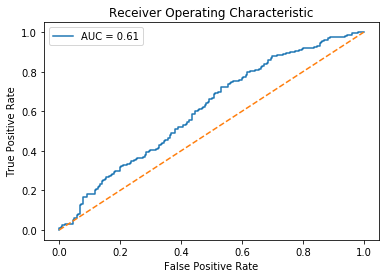

In [173]:
# predict probabilities for X_test using predict_proba
probabilities = bestFit_Knn.predict_proba(X_test)

# select the probabilities for label 1.0
y_proba = probabilities[:,1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_proba, pos_label=1)

# calculate AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

0.5283954714754582


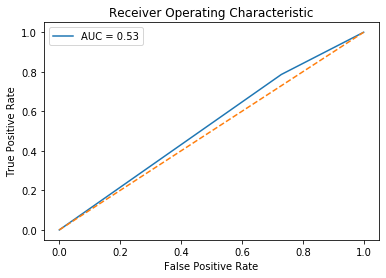

In [182]:
pred = svc_best_fit.predict(X_test)

# select the probabilities for label 1.0
# y_clf_proba = probabilities[:,1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred, pos_label=1)

# calculate AUC
roc_auc_clf = auc(false_positive_rate, true_positive_rate)
print(roc_auc_clf)
plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot_clf = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc_clf))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

0.6090459859128959


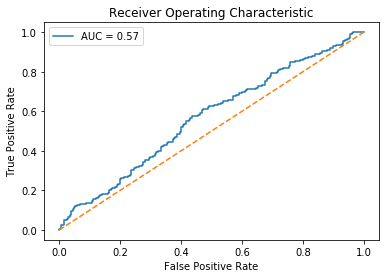

In [184]:
# predict probabilities for X_test using predict_proba
probabilities_rf = bestFit_RF.predict_proba(X_test)

# select the probabilities for label 1.0
rf_y_proba = probabilities_rf[:,1]

# calculate false positive rate and true positive rate at different thresholds
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_y_proba, pos_label=1)

# calculate AUC
roc_auc_rf = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.title('Receiver Operating Characteristic')
# plot the false positive rate on the x axis and the true positive rate on the y axis
roc_plot = plt.plot(false_positive_rate,
                    true_positive_rate,
                    label='AUC = {:0.2f}'.format(roc_auc_rf))

plt.legend(loc=0)
plt.plot([0,1], [0,1], ls='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate');

# Final Model

In [220]:
#Going to train with best hyper parameter
parameters = {'metric': ['euclidean'], 'n_neighbors': [100], 'weights': ['distance']}
n_folds = 10
#FInal result obtained
final_model = GridSearchCV(KNeighborsClassifier(), 
                           parameters, cv=n_folds, 
                           verbose = 1, n_jobs = -1, 
                                scoring="f1")
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
print(metrics.classification_report(y_test, y_pred))


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.2s finished


              precision    recall  f1-score   support

         0.0       0.75      0.01      0.03       207
         1.0       0.79      1.00      0.88       786

    accuracy                           0.79       993
   macro avg       0.77      0.51      0.46       993
weighted avg       0.78      0.79      0.71       993



In [148]:
#  bb_img = io.imread('dataset/test_img/bb.jpg')

In [147]:
# plt.imshow(bb_img)

In [146]:
# bb_img_grey = rgb2grey(bb_img)
# plt.imshow(bb_img_grey)

In [145]:
# bb_hog_features, bb_hog_image = hog(bb_img_grey,
#                               visualize=True,
#                               block_norm='L2-Hys',
#                               pixels_per_cell=(16, 16))
# print(bb_hog_features)
# to_predict = [bb_hog_features]
# a =np.array(to_predict)
# # show our hog_image with a grey colormap
# plt.imshow(bb_hog_image, cmap=plt.cm.gray)